In this project I will use the data provided by the company Aptness, about their operations in the subcompany Apt Fitting. I have data from Monday, ShopMonkey and pottentially Quick Books.

The data from Monday it is from May 2023 to Oct 2024, almost a year and a half of data. Same for the data from SM that goes from  May 2023 to Nov 2024

# MONDAY

In [3]:
import phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Monday = pd.read_excel('/Users/liz/Documents/Master Data Science/Practicum II/Data/Amerit_Units_checklist_2023_2024.xlsx', index_col='Unit')
Monday

,Type,Dates - Start,Dates - End,At the shop,Status,Pending,Vinyl,Days at the shop,Invoice #,Amount,Item ID (auto generated)
Unit,,,,,,,,,,,
TIRE TRAILER,NaN,2024-08-27,2024-11-12,Yes,Awaiting deployment,NaN,Done,77,481.0,1691.88,7382055967
AF21-0414,MSC,2024-06-30,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,135,367.0,27118.74,6813671472
AF22-9854,MSC,2024-06-26,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,139,379.0,16787.23,6813739505
AF22-0538,MSC,2024-06-20,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,145,375.0,16787.23,6813718703
AF22-0659,MSC,2024-06-21,2024-11-02,Yes,Awaiting deployment,Send Tooling,Done,134,384.0,16787.23,6813751899
...,...,...,...,...,...,...,...,...,...,...,...
AF17-1763,MSC,2023-07-21,2023-08-11,Not anymore,Upfitted,NaN,NaN,21,44.0,11669.54,4861450592
AF23-2164,MSC,2023-05-18,2023-06-15,Not anymore,Upfitted,NaN,NaN,28,1015.0,4840.75,4650786912
AF12-4271,MSC,2023-05-26,2023-07-10,Not anymore,Upfitted,NaN,NaN,45,1016.0,14077.62,4692615103


In [5]:
Monday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, TIRE TRAILER to AF23-2163
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Type                      160 non-null    object        
 1   Dates - Start             161 non-null    datetime64[ns]
 2   Dates - End               161 non-null    datetime64[ns]
 3   At the shop               161 non-null    object        
 4   Status                    160 non-null    object        
 5   Pending                   48 non-null     object        
 6   Vinyl                     150 non-null    object        
 7   Days at the shop          161 non-null    int64         
 8   Invoice #                 159 non-null    float64       
 9   Amount                    160 non-null    float64       
 10  Item ID (auto generated)  161 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 15.1

In [6]:
Monday.describe()

,Dates - Start,Dates - End,Days at the shop,Invoice #,Amount,Item ID (auto generated)
count,161,161,161.000000,159.000000,160.0000,1.610000e+02
mean,2024-01-09 08:02:58.881987584,2024-02-15 06:24:35.776397568,36.931677,242.222189,17015.7300,5.851584e+09
min,2023-05-18 00:00:00,2023-06-15 00:00:00,0.000000,40.000000,1691.8800,4.650351e+09
25%,2023-08-29 00:00:00,2023-09-21 00:00:00,15.000000,106.500000,15238.9600,5.056048e+09
50%,2023-11-10 00:00:00,2024-01-04 00:00:00,28.000000,188.000000,16285.3350,5.459669e+09
75%,2024-06-07 00:00:00,2024-08-11 00:00:00,53.000000,363.500000,17100.8300,6.796229e+09
max,2024-10-18 00:00:00,2024-11-12 00:00:00,145.000000,1018.000000,37646.9700,7.620867e+09
std,NaN,NaN,29.385184,185.415523,5901.4227,9.154021e+08


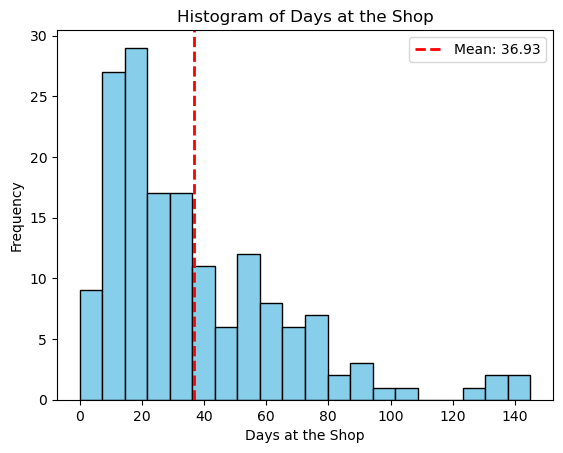

In [7]:
# Calculate the mean of 'days at the shop'
mean_days = Monday['Days at the shop'].mean()

# Plotting the histogram
plt.hist(Monday['Days at the shop'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_days:.2f}')

# Adding labels and title
plt.xlabel('Days at the Shop')
plt.ylabel('Frequency')
plt.title('Histogram of Days at the Shop')
plt.legend()

# Display the plot
plt.show()

After looking at the Histogram of Days at the Shop and diggin a little bit af this columns meaning, I found out that currently, the database from Monday includes Start Date and End Date columns for intake and deployment. To improve tracking and assess efficiency, it is recommended to add 
Work Start Date and Work End Date Columns:  These will record when work on each unit begins and finishes.


-  
Trace Efficiency: Measure the actual time spent on upfitting and validate claims of faster turnaround compared to competito
  
- Client Solutions: Identify delays unrelated to work (e.g., awaiting client instructions) and propose tailored solutions.  

This enhancement will help Apt Fitting showcase its efficiency and address client-specific challenges effectively.
.  


<Axes: xlabel='Dates - Start'>

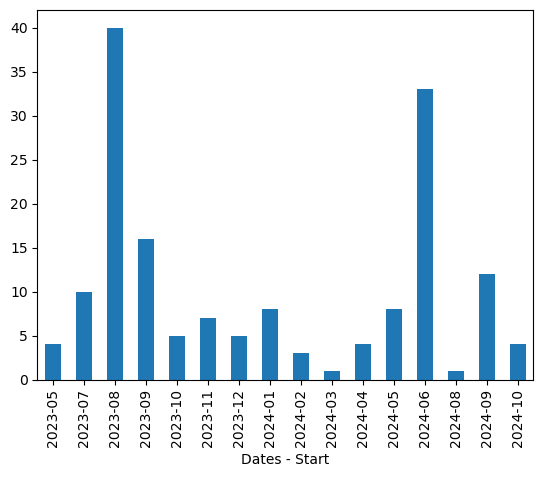

In [9]:
# Visualize job counts over time
Monday['Dates - Start'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')

We observe peaks in job activity during the summer months, particularly in 2023, with a significant surge in August. Job flow tends to slow down towards the end of the year and remains lower at the beginning of the following year, indicating a possible seasonal trend or reduced demand during these periods.

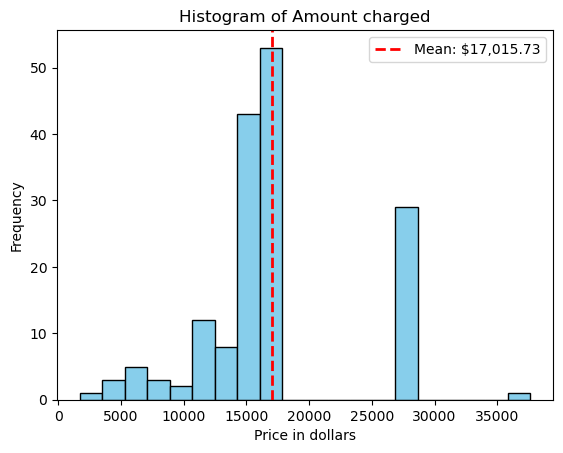

In [11]:
# Calculate the mean of 'Amount'
mean_amount = Monday['Amount'].mean()

# Plotting the histogram
plt.hist(Monday['Amount'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_amount, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_amount:,.2f}')

# Adding labels and title
plt.xlabel('Price in dollars')
plt.ylabel('Frequency')
plt.title('Histogram of Amount charged')
plt.legend()

# Display the plot
plt.show()

The histogram for the amount charge variable indicates the variancy of the work charged for each unit. Having a mean of $17,149.28. A minimun price charged of $1,691.88 and a max of $3,7646.97. We can see that there are more units charged around the mean value. 

This doesnt tell us much about the revenue, since we are just having the price charged for the work done. I will have do get into Shop Monkey database to see if I can find data related with revenue, costs and eventually profitability.

In [13]:
total_amount = Monday['Amount'].sum()
print(f'Total Amount Charged: ${total_amount:,.2f}')

Total Amount Charged: $2,722,516.80


In [14]:
# Calculate the total amount charged for each year (2023 and 2024)

# Ensure 'Date' column is in datetime format
Monday['Dates - End'] = pd.to_datetime(Monday['Dates - End'])

# Filter for 2023 and calculate the total
total_2023 = Monday[Monday['Dates - End'].dt.year == 2023]['Amount'].sum()

# Filter for 2024 and calculate the total
total_2024 = Monday[Monday['Dates - End'].dt.year == 2024]['Amount'].sum()

# Print results with commas
print(f"Total Amount Charged in 2023: ${total_2023:,.2f}")
print(f"Total Amount Charged in 2024: ${total_2024:,.2f}")

Total Amount Charged in 2023: $1,137,426.14
Total Amount Charged in 2024: $1,585,090.66


interval columns not set, guessing: ['Days at the shop', 'Invoice #', 'Amount', 'Item ID (auto generated)']


/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable Vinyl for analysis 1. Dropping this column
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<Axes: >

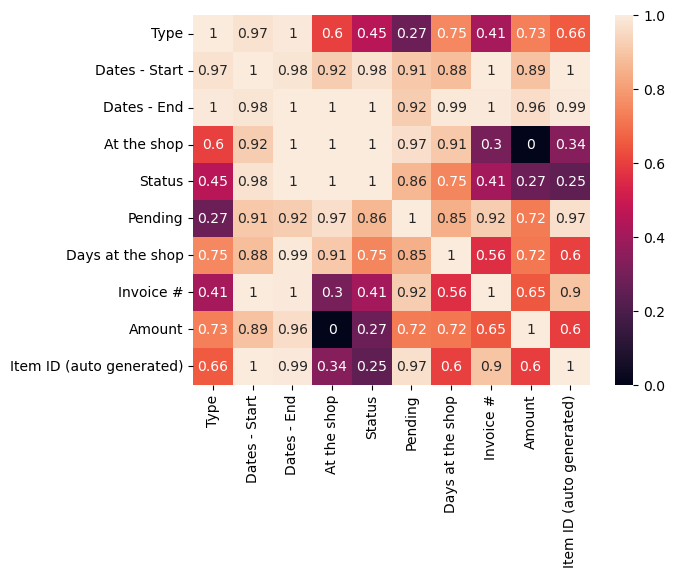

In [15]:
sns.heatmap(Monday.phik_matrix(), annot=True)

From the heatmap, we can analyze the relationship and correlation between some variables:

**Days at the Shop and Amount:**

**Question:** Is there a correlation between the number of days a unit spends at the shop and the amount charged?

**Reason:** This could reveal if longer durations in the shop tend to correlate with higher charges, possibly due to more labor or extensive services.

**Analysis:** We observe a strong positive correlation of 0.72 between these two variables. However, we cannot conclude that longer durations at the shop result in higher charges for the unit (vehicle upfitted). The price charged depends on the parts and work required, not on the time a unit remains in the shop.

Previously, we noted that the days spent at the shop are influenced by factors like intake and deployment processes. Some units spend additional time at the shop because they lack a delivery location, which is more of a delay from the customer’s side rather than the time needed to upfit the unit.

That said, we can infer that a longer stay at the shop, if it leads to immediate delivery upon completion, may indicate that the unit required more work, parts, or upfitting. Consequently, these units would incur higher charges compared to those requiring minimal upfitting and quicker turnaround times.


**Type and Amount:**

**Question:** Do different types of work correlate with higher or lower amounts?

**Analysis:**  The heatmap shows a moderate positive correlation (0.75) between "Type" and "Amount."

This suggests that certain "Types" of work might be associated with higher charges, likely due to the complexity or resources required for those jobs.

To investigate, "Type" should be converted to numeric labels, and an analysis should determine the average amount charged for each type. A boxplot or bar chart showing the distribution of charges for each type would be insightful.

This analysis could reveal patterns, such as certain types consistently resulting in higher costs, which could help in pricing strategy or resource allocation
ns.es.

In [17]:
# Convert 'Type' column to numeric labels
Monday['Type_numeric'] = Monday['Type'].astype('category').cat.codes

# Calculate the average amount charged for each type
average_amount_per_type = Monday.groupby('Type')['Amount'].mean()

# Print the averages for reference
print("Average amount charged for each type:")
print(average_amount_per_type)

Monday['Type'].value_counts()

Average amount charged for each type:
Type
Electrical System    37646.970000
MSC                  18011.498774
MSC Stolen Unit               NaN
Maverick             10026.573333
Transit EV           11536.230000
Ubody                15418.927609
Name: Amount, dtype: float64


Type
MSC                  106
Ubody                 46
Maverick               3
Transit EV             3
MSC Stolen Unit        1
Electrical System      1
Name: count, dtype: int64

The average amount charged for each type shows significant variation:

- Electrical System has the highest average charge: $37,647.

- MSC follows with an average of $17,859, reflecting a wide range of values given its large count (107 entries).

- Ubody averages at $15,419, showing slightly lower charges than MSC.

- Transit EV and Maverick are smaller categories with average charges of $11,536 and $10,027, respectively.

- MSC Stolen Unit lacks sufficient data for meaningful analysis (only 1 entry).

/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/2087300585.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Monday, x='Type', y='Amount', order=sorted_types, palette='Set3')


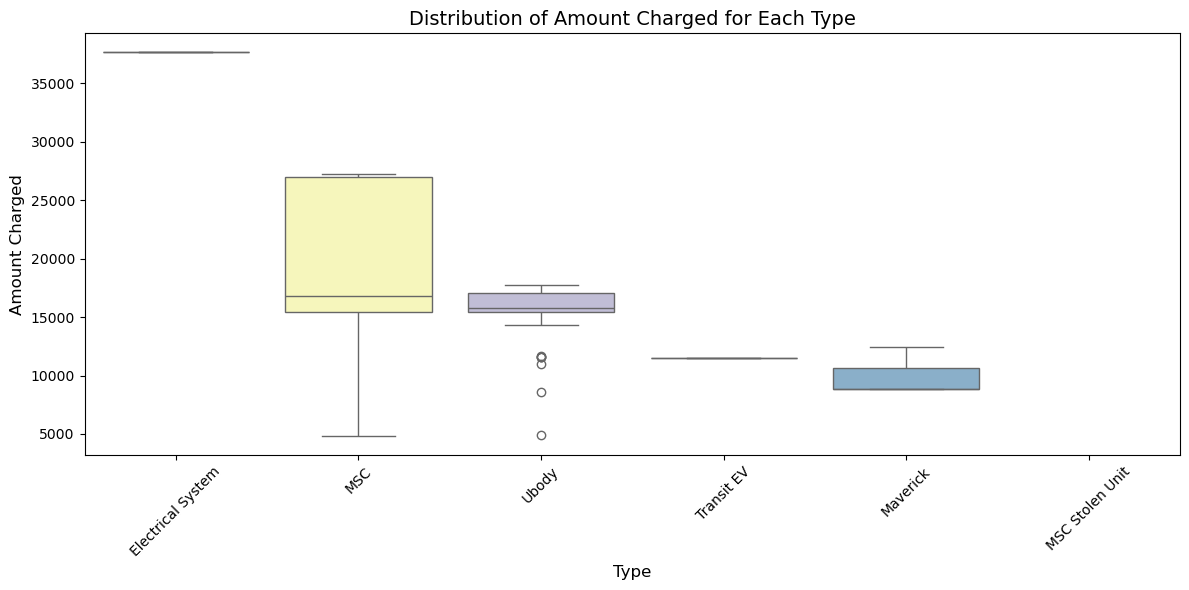

In [19]:
# Sort the types by the average amount charged (from highest to lowest)
sorted_types = average_amount_per_type.sort_values(ascending=False).index

# Create a boxplot to show the distribution of charges for each type (organized by average amount)
plt.figure(figsize=(12, 6))
sns.boxplot(data=Monday, x='Type', y='Amount', order=sorted_types, palette='Set3')
plt.title('Distribution of Amount Charged for Each Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Amount Charged', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplot demonstrates variability within and between types:

- Electrical System has a single data point, showing no variability but highlighting its high charge.

- MSC has the largest count, with a wide range and some lower outliers, suggesting varying complexity or scope within this type.

- Ubody also shows variability but has tighter clustering compared to MSC.

- Maverick and Transit EV have limited samples, resulting in less variability and lower averages overall.

- Outliers in MSC and Ubody suggest specific jobs requiring much higher resources or effort.

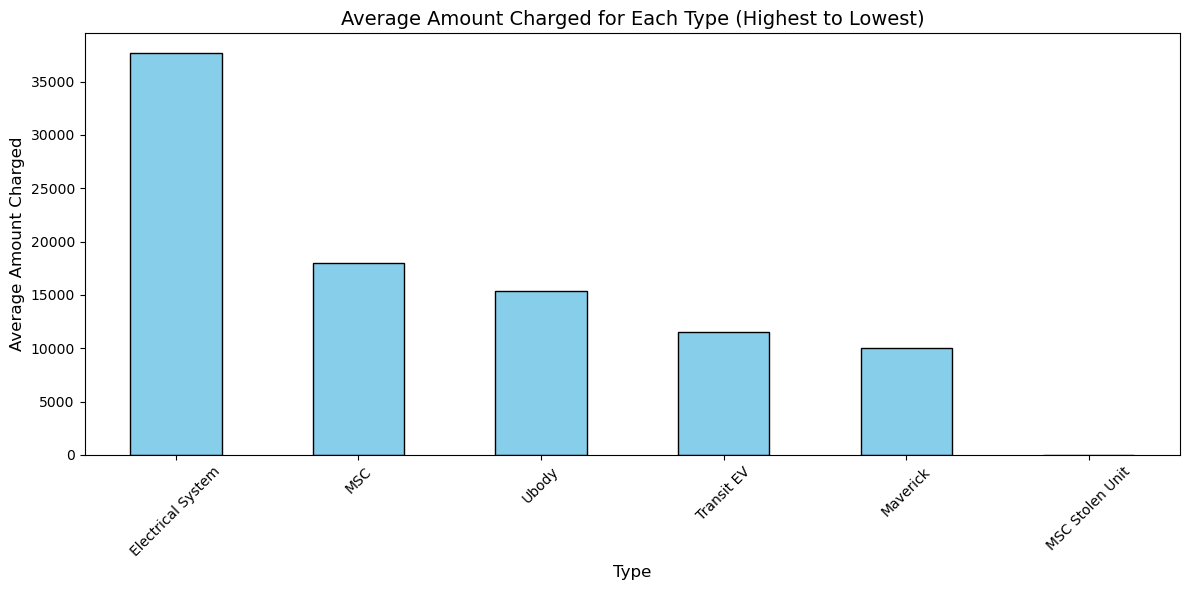

In [21]:
# Create a bar chart for the average amount charged for each type (organized by average amount)
plt.figure(figsize=(12, 6))
average_amount_per_type.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Amount Charged for Each Type (Highest to Lowest)', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Average Amount Charged', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart highlights the clear hierarchy of costs:

- Electrical System is the most lucrative or resource-intensive.

- MSC and Ubody are consistently mid-tier in terms of charges, suggesting they might involve less specialized work.

- Transit EV and Maverick are the least expensive types, perhaps reflecting simpler tasks or lower complexity.


**Consistently Higher Costs:** Electrical System and MSC jobs consistently result in higher charges, likely due to specialized labor, materials, or equipment.

**Pricing Strategy:** Outliers in MSC and Ubody might indicate either mispriced jobs or exceptional circumstances requiring review. This can guide adjustments in the pricing model to ensure consistency and profitability.

**Resource Allocation:** High-charge categories like Electrical System and MSC should prioritize skilled labor and high-quality materials, given their impact on revenue.

**Low-Charge Jobs:** Transit EV and Maverick may be entry-level or simpler tasks. These types could benefit from standardization or bundling to increase efficiency and revenue.

**Recomendations**

- Focus on High-Value Types: Leverage the profitability of Electrical System jobs by potentially expanding offerings in this category.

- Improve Efficiency in Low-Value Jobs: Simplify or automate Transit EV and Maverick tasks to reduce costs and increase margins.

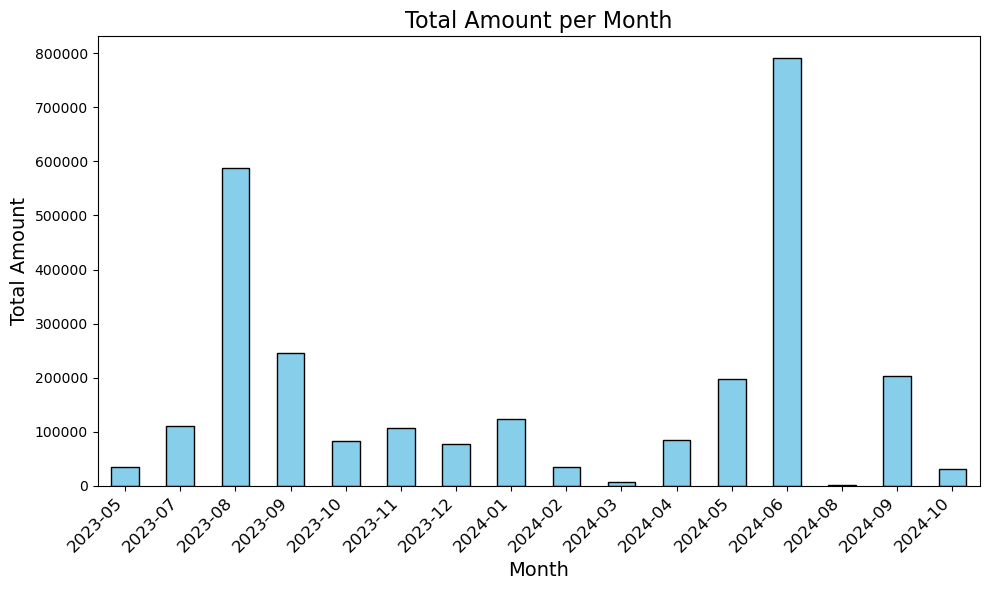

In [24]:
#Total amount per month of date created

# Group by month and sum the 'Total' column
Monday['Month'] = Monday['Dates - Start'].dt.to_period('M')
Monday_monthly_totals = Monday.groupby('Month')['Amount'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
Monday_monthly_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Amount per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
Monday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, TIRE TRAILER to AF23-2163
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Type                      160 non-null    object        
 1   Dates - Start             161 non-null    datetime64[ns]
 2   Dates - End               161 non-null    datetime64[ns]
 3   At the shop               161 non-null    object        
 4   Status                    160 non-null    object        
 5   Pending                   48 non-null     object        
 6   Vinyl                     150 non-null    object        
 7   Days at the shop          161 non-null    int64         
 8   Invoice #                 159 non-null    float64       
 9   Amount                    160 non-null    float64       
 10  Item ID (auto generated)  161 non-null    int64         
 11  Type_numeric              161 non-null    int8          
 12  Month     

In [26]:
Monday

,Type,Dates - Start,Dates - End,At the shop,Status,Pending,Vinyl,Days at the shop,Invoice #,Amount,Item ID (auto generated),Type_numeric,Month
Unit,,,,,,,,,,,,,
TIRE TRAILER,NaN,2024-08-27,2024-11-12,Yes,Awaiting deployment,NaN,Done,77,481.0,1691.88,7382055967,-1,2024-08
AF21-0414,MSC,2024-06-30,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,135,367.0,27118.74,6813671472,1,2024-06
AF22-9854,MSC,2024-06-26,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,139,379.0,16787.23,6813739505,1,2024-06
AF22-0538,MSC,2024-06-20,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,145,375.0,16787.23,6813718703,1,2024-06
AF22-0659,MSC,2024-06-21,2024-11-02,Yes,Awaiting deployment,Send Tooling,Done,134,384.0,16787.23,6813751899,1,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AF17-1763,MSC,2023-07-21,2023-08-11,Not anymore,Upfitted,NaN,NaN,21,44.0,11669.54,4861450592,1,2023-07
AF23-2164,MSC,2023-05-18,2023-06-15,Not anymore,Upfitted,NaN,NaN,28,1015.0,4840.75,4650786912,1,2023-05
AF12-4271,MSC,2023-05-26,2023-07-10,Not anymore,Upfitted,NaN,NaN,45,1016.0,14077.62,4692615103,1,2023-05


# SHOP MONKEY

In [28]:
ShopMonkey = pd.read_excel('/Users/liz/Documents/Master Data Science/Practicum II/Data/ShopMonkey_orders.xlsx', index_col='Order #')
ShopMonkey

,Order Status,First Name,Last Name,Company,Vehicle,Order Name,Term,Due Date,Paid Status,PO Number,...,Retail Tires,Subcontract,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total
Order #,,,,,,,,,,,,,,,,,,,,,
529,Invoice,Amerit Fleet Solutions,NaN,NaN,2014 Ford E-350 Super Duty,AF14-4433,Net 60,2025-01-06T06:59:59.999Z,Unpaid,NaN,...,0,0.0,387.54,0,0,0.00,0.0,0,4786.39,4786.39
528,Estimate,Amerit Fleet Solutions,NaN,NaN,NaN,Auxiliary Battery Install and 1 More,On Receipt,NaN,Estimate,NaN,...,0,0.0,83.12,0,0,0.00,0.0,0,1470.71,1470.71
526,Estimate,Enterprise,NaN,NaN,2020 International MV607,E-7S3OP0,Net 30,NaN,Estimate,NaN,...,0,0.0,0.00,0,0,1350.00,0.0,0,1350.00,1350.00
525,Invoice,Amerit Fleet Solutions,NaN,NaN,2019 Ford E-350 Super Duty,AF19-0658,Net 60,2025-01-06T06:59:59.999Z,Unpaid,NaN,...,0,0.0,0.00,0,0,197.88,0.0,0,197.88,197.88
524,Invoice,NaN,NaN,NaN,2010 Ford F-250 Super Duty,AF10-1169,On Receipt,NaN,Unpaid,NaN,...,0,0.0,0.00,0,0,203.68,0.0,0,203.68,203.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Invoice,Amerit Fleet Solutions,NaN,NaN,2023 Ford F-250 Super Duty,AF23-2164,Net 60,2023-08-12T05:59:59.999Z,Overdue,NaN,...,0,1500.0,103.70,0,0,0.00,0.0,0,4889.14,4889.14
9,Invoice,Amerit Fleet Solutions,NaN,NaN,2023 Ford F-250 Super Duty,AF23-2164-1,Net 60,2023-08-02T05:59:59.999Z,Overdue,NaN,...,0,240.0,447.34,0,0,0.00,0.0,0,7399.88,7399.88
8,Invoice,Amerit Fleet Solutions,NaN,NaN,NaN,Oil Skid Repair 510231,Net 60,2023-08-02T05:59:59.999Z,Overdue,NaN,...,0,240.0,224.77,0,0,0.00,0.0,0,4022.64,4022.64


In [29]:
ShopMonkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 529 to 1
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order Status         471 non-null    object 
 1   First Name           469 non-null    object 
 2   Last Name            28 non-null     object 
 3   Company              25 non-null     object 
 4   Vehicle              410 non-null    object 
 5   Order Name           471 non-null    object 
 6   Term                 471 non-null    object 
 7   Due Date             450 non-null    object 
 8   Paid Status          471 non-null    object 
 9   PO Number            38 non-null     object 
 10  Vin                  405 non-null    object 
 11  Unit #               391 non-null    object 
 12  License Plate        9 non-null      object 
 13  Date Created         471 non-null    object 
 14  Date Completed       1 non-null      object 
 15  Date Invoiced        461 non-null    object 


In [30]:
ShopMonkey.describe()

,Date Fully Paid,Last Payment Posted,Payment Type,Labor,Retail Parts,Retail Tires,Subcontract,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total
count,0.0,0.0,0.0,471.000000,471.000000,471.0,471.000000,471.000000,471.0,471.0,471.000000,471.000000,471.0,471.000000,471.000000
mean,NaN,NaN,NaN,1286.131316,5269.933843,0.0,141.646497,442.285817,0.0,0.0,387.642569,54.465924,0.0,7473.174119,7473.174119
std,NaN,NaN,NaN,2120.470461,8264.795889,0.0,431.857450,711.286035,0.0,0.0,830.244508,585.532658,0.0,10013.209842,10013.209842
min,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,355.210000,355.210000
50%,NaN,NaN,NaN,121.550000,505.780000,0.0,0.000000,40.700000,0.0,0.0,125.000000,0.000000,0.0,3050.000000,3050.000000
75%,NaN,NaN,NaN,3287.470000,10850.490000,0.0,0.000000,953.210000,0.0,0.0,180.000000,0.000000,0.0,16327.410000,16327.410000
max,NaN,NaN,NaN,30731.000000,101750.000000,0.0,1500.000000,8964.180000,0.0,0.0,4370.000000,8689.460000,0.0,110714.180000,110714.180000


In [31]:
# Fill empty 'Company' cells with the 'First Name' value if 'Company' is empty
ShopMonkey['Company'] = ShopMonkey['Company'].fillna(ShopMonkey['First Name'])

# Display the updated DataFrame
ShopMonkey

,Order Status,First Name,Last Name,Company,Vehicle,Order Name,Term,Due Date,Paid Status,PO Number,...,Retail Tires,Subcontract,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total
Order #,,,,,,,,,,,,,,,,,,,,,
529,Invoice,Amerit Fleet Solutions,NaN,Amerit Fleet Solutions,2014 Ford E-350 Super Duty,AF14-4433,Net 60,2025-01-06T06:59:59.999Z,Unpaid,NaN,...,0,0.0,387.54,0,0,0.00,0.0,0,4786.39,4786.39
528,Estimate,Amerit Fleet Solutions,NaN,Amerit Fleet Solutions,NaN,Auxiliary Battery Install and 1 More,On Receipt,NaN,Estimate,NaN,...,0,0.0,83.12,0,0,0.00,0.0,0,1470.71,1470.71
526,Estimate,Enterprise,NaN,Enterprise,2020 International MV607,E-7S3OP0,Net 30,NaN,Estimate,NaN,...,0,0.0,0.00,0,0,1350.00,0.0,0,1350.00,1350.00
525,Invoice,Amerit Fleet Solutions,NaN,Amerit Fleet Solutions,2019 Ford E-350 Super Duty,AF19-0658,Net 60,2025-01-06T06:59:59.999Z,Unpaid,NaN,...,0,0.0,0.00,0,0,197.88,0.0,0,197.88,197.88
524,Invoice,NaN,NaN,NaN,2010 Ford F-250 Super Duty,AF10-1169,On Receipt,NaN,Unpaid,NaN,...,0,0.0,0.00,0,0,203.68,0.0,0,203.68,203.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Invoice,Amerit Fleet Solutions,NaN,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164,Net 60,2023-08-12T05:59:59.999Z,Overdue,NaN,...,0,1500.0,103.70,0,0,0.00,0.0,0,4889.14,4889.14
9,Invoice,Amerit Fleet Solutions,NaN,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164-1,Net 60,2023-08-02T05:59:59.999Z,Overdue,NaN,...,0,240.0,447.34,0,0,0.00,0.0,0,7399.88,7399.88
8,Invoice,Amerit Fleet Solutions,NaN,Amerit Fleet Solutions,NaN,Oil Skid Repair 510231,Net 60,2023-08-02T05:59:59.999Z,Overdue,NaN,...,0,240.0,224.77,0,0,0.00,0.0,0,4022.64,4022.64


In [32]:
ShopMonkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 529 to 1
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order Status         471 non-null    object 
 1   First Name           469 non-null    object 
 2   Last Name            28 non-null     object 
 3   Company              469 non-null    object 
 4   Vehicle              410 non-null    object 
 5   Order Name           471 non-null    object 
 6   Term                 471 non-null    object 
 7   Due Date             450 non-null    object 
 8   Paid Status          471 non-null    object 
 9   PO Number            38 non-null     object 
 10  Vin                  405 non-null    object 
 11  Unit #               391 non-null    object 
 12  License Plate        9 non-null      object 
 13  Date Created         471 non-null    object 
 14  Date Completed       1 non-null      object 
 15  Date Invoiced        461 non-null    object 


In [33]:
#Delete colums I wont use
columns_to_delete = [
    'Last Name', 'Due Date', 'Paid Status', 'PO Number', 'Vin', 
    'License Plate', 'Date Completed', 'Date Fully Paid', 
    'Last Payment Posted', 'Payment Type'
]

ShopMonkey = ShopMonkey.drop(columns=columns_to_delete)
ShopMonkey

,Order Status,First Name,Company,Vehicle,Order Name,Term,Unit #,Date Created,Date Invoiced,Workflow,...,Retail Tires,Subcontract,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total
Order #,,,,,,,,,,,,,,,,,,,,,
529,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2014 Ford E-350 Super Duty,AF14-4433,Net 60,AF14-4433,11/06/2024,11/06/2024,Invoice (Luisa),...,0,0.0,387.54,0,0,0.00,0.0,0,4786.39,4786.39
528,Estimate,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,Auxiliary Battery Install and 1 More,On Receipt,NaN,11/05/2024,NaN,Inbound,...,0,0.0,83.12,0,0,0.00,0.0,0,1470.71,1470.71
526,Estimate,Enterprise,Enterprise,2020 International MV607,E-7S3OP0,Net 30,NaN,11/01/2024,NaN,In Progress,...,0,0.0,0.00,0,0,1350.00,0.0,0,1350.00,1350.00
525,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2019 Ford E-350 Super Duty,AF19-0658,Net 60,AF19-0658,11/01/2024,11/06/2024,Invoice (Luisa),...,0,0.0,0.00,0,0,197.88,0.0,0,197.88,197.88
524,Invoice,NaN,NaN,2010 Ford F-250 Super Duty,AF10-1169,On Receipt,AF07-9487,11/01/2024,11/06/2024,Invoice (Luisa),...,0,0.0,0.00,0,0,203.68,0.0,0,203.68,203.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164,Net 60,AF23-2164,05/10/2023,06/12/2023,Deployed (Waiting on Amerit Payment),...,0,1500.0,103.70,0,0,0.00,0.0,0,4889.14,4889.14
9,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164-1,Net 60,AF23-2164,05/10/2023,06/02/2023,Deployed (Waiting on Amerit Payment),...,0,240.0,447.34,0,0,0.00,0.0,0,7399.88,7399.88
8,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,Oil Skid Repair 510231,Net 60,NaN,05/10/2023,06/02/2023,Deployed (Waiting on Amerit Payment),...,0,240.0,224.77,0,0,0.00,0.0,0,4022.64,4022.64


In [34]:
ShopMonkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 529 to 1
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Status   471 non-null    object 
 1   First Name     469 non-null    object 
 2   Company        469 non-null    object 
 3   Vehicle        410 non-null    object 
 4   Order Name     471 non-null    object 
 5   Term           471 non-null    object 
 6   Unit #         391 non-null    object 
 7   Date Created   471 non-null    object 
 8   Date Invoiced  461 non-null    object 
 9   Workflow       471 non-null    object 
 10  Labor          471 non-null    float64
 11  Retail Parts   471 non-null    float64
 12  Retail Tires   471 non-null    int64  
 13  Subcontract    471 non-null    float64
 14  Tax            471 non-null    float64
 15  EPA            471 non-null    int64  
 16  Shop Supplies  471 non-null    int64  
 17  Fees           471 non-null    float64
 18  Discount       

In [35]:
ShopMonkey['Company'].value_counts()

Company
Amerit Fleet Solutions     369
Enterprise                  37
ENTERPRISE                  22
Penske 53rd                 14
Penske 32nd                  7
Ascend                       5
Ink Monster                  5
Craig                        2
Apt Wash                     2
-Ink Monstr                  1
Aptness LLC                  1
Ammortal Inc                 1
S Oil                        1
INK MONSTR                   1
Ascend pressure Washing      1
Name: count, dtype: int64

In [36]:
# Filter the data to only include entries where 'Company' is 'Amerit Fleet Solutions'
Amerit_data = ShopMonkey[ShopMonkey['Company'] == 'Amerit Fleet Solutions']
Amerit_data

,Order Status,First Name,Company,Vehicle,Order Name,Term,Unit #,Date Created,Date Invoiced,Workflow,...,Retail Tires,Subcontract,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total
Order #,,,,,,,,,,,,,,,,,,,,,
529,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2014 Ford E-350 Super Duty,AF14-4433,Net 60,AF14-4433,11/06/2024,11/06/2024,Invoice (Luisa),...,0,0.0,387.54,0,0,0.00,0.0,0,4786.39,4786.39
528,Estimate,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,Auxiliary Battery Install and 1 More,On Receipt,NaN,11/05/2024,NaN,Inbound,...,0,0.0,83.12,0,0,0.00,0.0,0,1470.71,1470.71
525,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2019 Ford E-350 Super Duty,AF19-0658,Net 60,AF19-0658,11/01/2024,11/06/2024,Invoice (Luisa),...,0,0.0,0.00,0,0,197.88,0.0,0,197.88,197.88
523,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2007 Ford F-150,AF07-9487,Net 60,AF07-9487,11/01/2024,11/06/2024,Invoice (Luisa),...,0,0.0,0.00,0,0,203.68,0.0,0,203.68,203.68
517,Estimate,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,ECS (2024 Rebate 500),Net 60,ECS (2024 Rebate 500),10/25/2024,NaN,Inbound,...,0,0.0,1092.59,0,0,0.00,500.0,0,13989.39,13989.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164,Net 60,AF23-2164,05/10/2023,06/12/2023,Deployed (Waiting on Amerit Payment),...,0,1500.0,103.70,0,0,0.00,0.0,0,4889.14,4889.14
9,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164-1,Net 60,AF23-2164,05/10/2023,06/02/2023,Deployed (Waiting on Amerit Payment),...,0,240.0,447.34,0,0,0.00,0.0,0,7399.88,7399.88
8,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,Oil Skid Repair 510231,Net 60,NaN,05/10/2023,06/02/2023,Deployed (Waiting on Amerit Payment),...,0,240.0,224.77,0,0,0.00,0.0,0,4022.64,4022.64


In [37]:
Amerit_data.describe()

,Labor,Retail Parts,Retail Tires,Subcontract,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total
count,369.000000,369.000000,369.0,369.000000,369.000000,369.0,369.0,369.000000,369.000000,369.0,369.000000,369.000000
mean,1533.921843,6594.533523,0.0,180.800813,553.786016,0.0,0.0,407.495718,67.747832,0.0,9202.790081,9202.790081
std,1707.466296,8769.841831,0.0,480.724100,755.961822,0.0,0.0,911.196911,660.233070,0.0,10457.140733,10457.140733
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,81.950000,81.950000
25%,0.000000,41.860000,0.0,0.000000,3.690000,0.0,0.0,0.000000,0.000000,0.0,496.830000,496.830000
50%,233.750000,3506.100000,0.0,0.000000,308.890000,0.0,0.0,125.000000,0.000000,0.0,4011.740000,4011.740000
75%,3381.910000,11995.030000,0.0,0.000000,982.590000,0.0,0.0,150.000000,0.000000,0.0,16677.100000,16677.100000
max,10046.600000,101750.000000,0.0,1500.000000,8964.180000,0.0,0.0,4370.000000,8689.460000,0.0,110714.180000,110714.180000


In [38]:
#Convert Date Created variable to Datetime format

Amerit_data['Date Created'] = pd.to_datetime(Amerit_data['Date Created'])
Amerit_data['Date Invoiced'] = pd.to_datetime(Amerit_data['Date Invoiced'])

/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/1126241258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit_data['Date Created'] = pd.to_datetime(Amerit_data['Date Created'])
/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/1126241258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit_data['Date Invoiced'] = pd.to_datetime(Amerit_data['Date Invoiced'])


In [39]:
# Find the earliest and latest dates:

Amerit_data['Date Created'].min()

Timestamp('2023-05-05 00:00:00')

In [40]:
Amerit_data['Date Created'].max()

Timestamp('2024-11-06 00:00:00')

<Axes: xlabel='Date Created'>

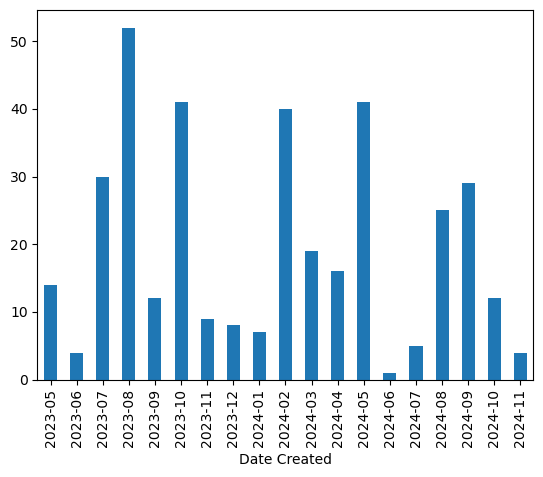

In [41]:
# Visualize job counts over time
Amerit_data['Date Created'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')

In [42]:
Amerit_data['Date Created'].dt.to_period('M').value_counts().sort_index()

Date Created
2023-05    14
2023-06     4
2023-07    30
2023-08    52
2023-09    12
2023-10    41
2023-11     9
2023-12     8
2024-01     7
2024-02    40
2024-03    19
2024-04    16
2024-05    41
2024-06     1
2024-07     5
2024-08    25
2024-09    29
2024-10    12
2024-11     4
Freq: M, Name: count, dtype: int64

/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/4011226337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit_data['Month'] = Amerit_data['Date Created'].dt.to_period('M')


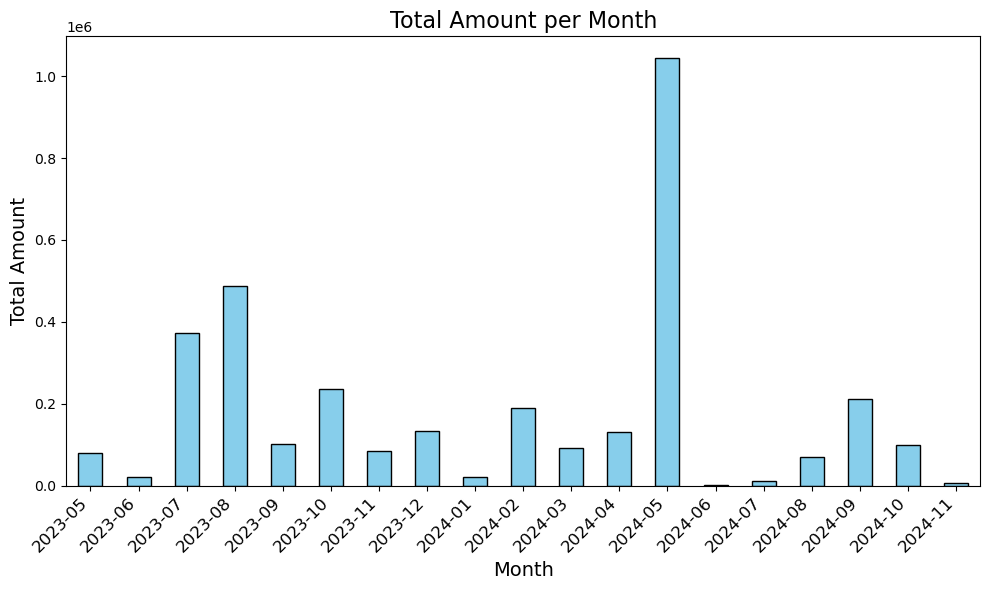

In [43]:
#Total amount per month of date created

# Group by month and sum the 'Total' column
Amerit_data['Month'] = Amerit_data['Date Created'].dt.to_period('M')
SM_monthly_totals = Amerit_data.groupby('Month')['Total'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
SM_monthly_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Amount per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/3315369672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit_data['Month1'] = Amerit_data['Date Invoiced'].dt.to_period('M')


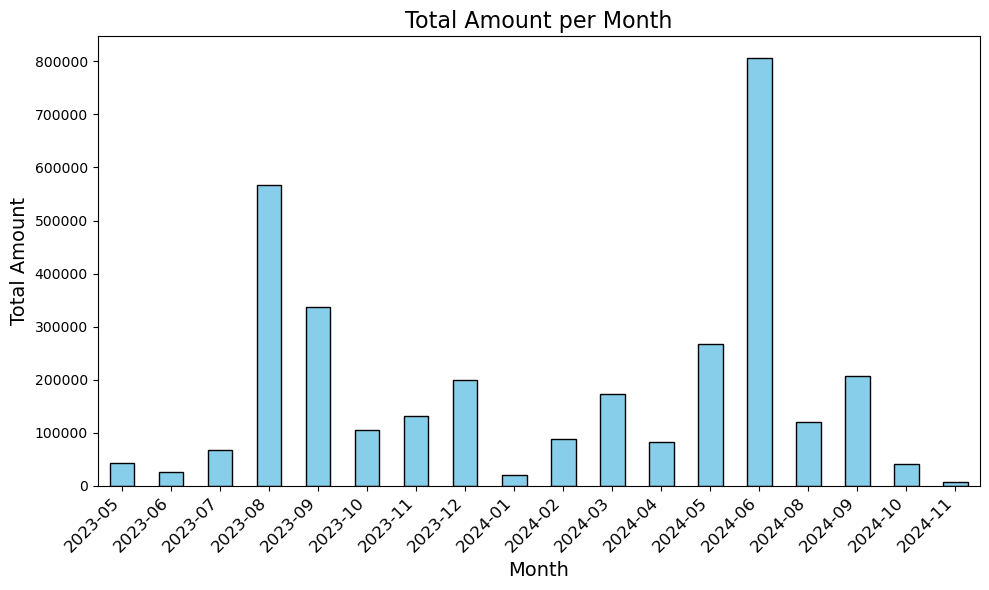

In [44]:
#Total amount per month of date Invoiced

# Group by month and sum the 'Total' column
Amerit_data['Month1'] = Amerit_data['Date Invoiced'].dt.to_period('M')
SM_monthly_totals = Amerit_data.groupby('Month1')['Total'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
SM_monthly_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Amount per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [45]:
Amerit_data

,Order Status,First Name,Company,Vehicle,Order Name,Term,Unit #,Date Created,Date Invoiced,Workflow,...,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total,Month,Month1
Order #,,,,,,,,,,,,,,,,,,,,,
529,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2014 Ford E-350 Super Duty,AF14-4433,Net 60,AF14-4433,2024-11-06,2024-11-06,Invoice (Luisa),...,387.54,0,0,0.00,0.0,0,4786.39,4786.39,2024-11,2024-11
528,Estimate,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,Auxiliary Battery Install and 1 More,On Receipt,NaN,2024-11-05,NaT,Inbound,...,83.12,0,0,0.00,0.0,0,1470.71,1470.71,2024-11,NaT
525,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2019 Ford E-350 Super Duty,AF19-0658,Net 60,AF19-0658,2024-11-01,2024-11-06,Invoice (Luisa),...,0.00,0,0,197.88,0.0,0,197.88,197.88,2024-11,2024-11
523,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2007 Ford F-150,AF07-9487,Net 60,AF07-9487,2024-11-01,2024-11-06,Invoice (Luisa),...,0.00,0,0,203.68,0.0,0,203.68,203.68,2024-11,2024-11
517,Estimate,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,ECS (2024 Rebate 500),Net 60,ECS (2024 Rebate 500),2024-10-25,NaT,Inbound,...,1092.59,0,0,0.00,500.0,0,13989.39,13989.39,2024-10,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164,Net 60,AF23-2164,2023-05-10,2023-06-12,Deployed (Waiting on Amerit Payment),...,103.70,0,0,0.00,0.0,0,4889.14,4889.14,2023-05,2023-06
9,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,2023 Ford F-250 Super Duty,AF23-2164-1,Net 60,AF23-2164,2023-05-10,2023-06-02,Deployed (Waiting on Amerit Payment),...,447.34,0,0,0.00,0.0,0,7399.88,7399.88,2023-05,2023-06
8,Invoice,Amerit Fleet Solutions,Amerit Fleet Solutions,NaN,Oil Skid Repair 510231,Net 60,NaN,2023-05-10,2023-06-02,Deployed (Waiting on Amerit Payment),...,224.77,0,0,0.00,0.0,0,4022.64,4022.64,2023-05,2023-06


In [46]:
Amerit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 529 to 1
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Status   369 non-null    object        
 1   First Name     369 non-null    object        
 2   Company        369 non-null    object        
 3   Vehicle        351 non-null    object        
 4   Order Name     369 non-null    object        
 5   Term           369 non-null    object        
 6   Unit #         344 non-null    object        
 7   Date Created   369 non-null    datetime64[ns]
 8   Date Invoiced  364 non-null    datetime64[ns]
 9   Workflow       369 non-null    object        
 10  Labor          369 non-null    float64       
 11  Retail Parts   369 non-null    float64       
 12  Retail Tires   369 non-null    int64         
 13  Subcontract    369 non-null    float64       
 14  Tax            369 non-null    float64       
 15  EPA            369 non-null 

# Merge both Data Bases

In [48]:
# Rename columns to have the same name
Amerit_data.rename(columns={'Order Name': 'Unit'}, inplace=True)

/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/4195286607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit_data.rename(columns={'Order Name': 'Unit'}, inplace=True)


In [49]:
# Merge the datasets
merged_data = pd.merge(Monday, Amerit_data, on='Unit', how='outer') 

# Save the merged dataset
merged_data.to_csv('Merged_Data.csv', index=False)

print("Merge completed. The merged dataset is saved as 'Merged_Data.csv'.")

Merge completed. The merged dataset is saved as 'Merged_Data.csv'.


In [50]:
merged_data

,Unit,Type,Dates - Start,Dates - End,At the shop,Status,Pending,Vinyl,Days at the shop,Invoice #,...,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total,Month_y,Month1
0,TIRE TRAILER,NaN,2024-08-27,2024-11-12,Yes,Awaiting deployment,NaN,Done,77.0,481.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,AF21-0414,MSC,2024-06-30,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,135.0,367.0,...,1909.96,0.0,0.0,125.0,0.0,0.0,27118.74,27118.74,2024-05,2024-06
2,AF22-9854,MSC,2024-06-26,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,139.0,379.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,16787.23,2024-05,2024-06
3,AF22-0538,MSC,2024-06-20,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,145.0,375.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,16787.23,2024-05,2024-06
4,AF22-0659,MSC,2024-06-21,2024-11-02,Yes,Awaiting deployment,Send Tooling,Done,134.0,384.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,16787.23,2024-05,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,AF23-1263,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,88.03,0.0,0.0,0.0,0.0,0.0,4500.92,4500.92,2023-05,2023-06
398,AF23-2164-1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,447.34,0.0,0.0,0.0,0.0,0.0,7399.88,7399.88,2023-05,2023-06
399,Oil Skid Repair 510231,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,224.77,0.0,0.0,0.0,0.0,0.0,4022.64,4022.64,2023-05,2023-06
400,AF10-1395,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.0,0.0,0.0,0.0,187.00,187.00,2023-05,2023-05


After mergin the 161 entries from Monday and 369 entries from Amerit_data Including all rows from both datasets, filling unmatched rows with NaN, we have a new merge_data of 402 entries. Now I will performe some EDA and add some information about cost and revenue.

In [52]:
merged_data.describe()

,Dates - Start,Dates - End,Days at the shop,Invoice #,Amount,Item ID (auto generated),Type_numeric,Date Created,Date Invoiced,Labor,...,Retail Tires,Subcontract,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total
count,165,165,165.000000,163.000000,164.000000,1.650000e+02,165.000000,369,364,369.000000,...,369.0,369.000000,369.000000,369.0,369.0,369.000000,369.000000,369.0,369.000000,369.000000
mean,2024-01-05 15:51:16.363636480,2024-02-11 20:56:43.636363520,37.212121,244.615509,16826.514573,5.830411e+09,2.218182,2024-01-25 03:19:01.463414528,2024-02-04 10:52:44.835164928,1533.921843,...,0.0,180.800813,553.786016,0.0,0.0,407.495718,67.747832,0.0,9202.790081,9202.790081
min,2023-05-18 00:00:00,2023-06-15 00:00:00,0.000000,40.000000,1691.880000,4.650351e+09,-1.000000,2023-05-05 00:00:00,2023-05-22 00:00:00,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,81.950000,81.950000
25%,2023-08-29 00:00:00,2023-09-21 00:00:00,15.000000,106.500000,15146.820000,5.056048e+09,1.000000,2023-08-21 00:00:00,2023-09-12 00:00:00,0.000000,...,0.0,0.000000,3.690000,0.0,0.0,0.000000,0.000000,0.0,496.830000,496.830000
50%,2023-11-05 00:00:00,2023-12-01 00:00:00,28.000000,187.000000,16098.330000,5.344403e+09,1.000000,2024-02-20 00:00:00,2024-02-29 00:00:00,233.750000,...,0.0,0.000000,308.890000,0.0,0.0,125.000000,0.000000,0.0,4011.740000,4011.740000
75%,2024-06-06 00:00:00,2024-08-11 00:00:00,53.000000,363.500000,17100.830000,6.792913e+09,5.000000,2024-05-28 00:00:00,2024-06-12 00:00:00,3381.910000,...,0.0,0.000000,982.590000,0.0,0.0,150.000000,0.000000,0.0,16677.100000,16677.100000
max,2024-10-18 00:00:00,2024-11-12 00:00:00,145.000000,1018.000000,37646.970000,7.620867e+09,5.000000,2024-11-06 00:00:00,2024-11-06 00:00:00,10046.600000,...,0.0,1500.000000,8964.180000,0.0,0.0,4370.000000,8689.460000,0.0,110714.180000,110714.180000
std,NaN,NaN,29.625053,193.894246,5990.810545,9.150240e+08,1.834868,NaN,NaN,1707.466296,...,0.0,480.724100,755.961822,0.0,0.0,911.196911,660.233070,0.0,10457.140733,10457.140733


In [53]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unit                      402 non-null    object        
 1   Type                      164 non-null    object        
 2   Dates - Start             165 non-null    datetime64[ns]
 3   Dates - End               165 non-null    datetime64[ns]
 4   At the shop               165 non-null    object        
 5   Status                    164 non-null    object        
 6   Pending                   49 non-null     object        
 7   Vinyl                     152 non-null    object        
 8   Days at the shop          165 non-null    float64       
 9   Invoice #                 163 non-null    float64       
 10  Amount                    164 non-null    float64       
 11  Item ID (auto generated)  165 non-null    float64       
 12  Type_numeric          

In [54]:
#Since the variable 'Month' for the two databases were converted into 'Month_x' and 'Month_y', I will combine the Month_x and Month_y into a single column called Month

merged_data['Month'] = merged_data['Month_x'].fillna(merged_data['Month_y'])

# Drop the original Month_x and Month_y columns
merged_data = merged_data.drop(columns=['Month_x', 'Month_y'])

# Display the updated DataFrame
merged_data.head()

,Unit,Type,Dates - Start,Dates - End,At the shop,Status,Pending,Vinyl,Days at the shop,Invoice #,...,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Total,Month1,Month
0,TIRE TRAILER,NaN,2024-08-27,2024-11-12,Yes,Awaiting deployment,NaN,Done,77.0,481.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-08
1,AF21-0414,MSC,2024-06-30,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,135.0,367.0,...,1909.96,0.0,0.0,125.0,0.0,0.0,27118.74,27118.74,2024-06,2024-06
2,AF22-9854,MSC,2024-06-26,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,139.0,379.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,16787.23,2024-06,2024-06
3,AF22-0538,MSC,2024-06-20,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,145.0,375.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,16787.23,2024-06,2024-06
4,AF22-0659,MSC,2024-06-21,2024-11-02,Yes,Awaiting deployment,Send Tooling,Done,134.0,384.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,16787.23,2024-06,2024-06


In [55]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unit                      402 non-null    object        
 1   Type                      164 non-null    object        
 2   Dates - Start             165 non-null    datetime64[ns]
 3   Dates - End               165 non-null    datetime64[ns]
 4   At the shop               165 non-null    object        
 5   Status                    164 non-null    object        
 6   Pending                   49 non-null     object        
 7   Vinyl                     152 non-null    object        
 8   Days at the shop          165 non-null    float64       
 9   Invoice #                 163 non-null    float64       
 10  Amount                    164 non-null    float64       
 11  Item ID (auto generated)  165 non-null    float64       
 12  Type_numeric          

In [56]:
merged_data['Type'].value_counts()

Type
MSC                  109
Ubody                 47
Maverick               3
Transit EV             3
MSC Stolen Unit        1
Electrical System      1
Name: count, dtype: int64

Since Total and Amount are the same variable for both databases, but then they gor separated, I am going to combine both variables with the combine_first() method which prioritizes non-missing values in the column (Total) and fills in with values from the column (Amount) wherever Total is missing.
 

In [58]:
# Combine 'Total' and 'Amount' into a single column
merged_data['Amount'] = merged_data['Total'].combine_first(merged_data['Amount'])

# Drop the 'Total' column
merged_data.drop(columns=['Total'], inplace=True)

print(merged_data)

                       Unit Type Dates - Start Dates - End At the shop  \
0              TIRE TRAILER  NaN    2024-08-27  2024-11-12         Yes   
1                 AF21-0414  MSC    2024-06-30  2024-11-12         Yes   
2                 AF22-9854  MSC    2024-06-26  2024-11-12         Yes   
3                 AF22-0538  MSC    2024-06-20  2024-11-12         Yes   
4                 AF22-0659  MSC    2024-06-21  2024-11-02         Yes   
..                      ...  ...           ...         ...         ...   
397               AF23-1263  NaN           NaT         NaT         NaN   
398             AF23-2164-1  NaN           NaT         NaT         NaN   
399  Oil Skid Repair 510231  NaN           NaT         NaT         NaN   
400               AF10-1395  NaN           NaT         NaT         NaN   
401               AF19-7555  NaN           NaT         NaT         NaN   

                  Status       Pending Vinyl  Days at the shop  Invoice #  \
0    Awaiting deployment          

In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unit                      402 non-null    object        
 1   Type                      164 non-null    object        
 2   Dates - Start             165 non-null    datetime64[ns]
 3   Dates - End               165 non-null    datetime64[ns]
 4   At the shop               165 non-null    object        
 5   Status                    164 non-null    object        
 6   Pending                   49 non-null     object        
 7   Vinyl                     152 non-null    object        
 8   Days at the shop          165 non-null    float64       
 9   Invoice #                 163 non-null    float64       
 10  Amount                    401 non-null    float64       
 11  Item ID (auto generated)  165 non-null    float64       
 12  Type_numeric          

The data contains a variable called Amount, which represents the amount charged by Apt Fitting to Amerit for a unit or a supplemental job. To enhance the database, I will add the corresponding unit cost for jobs with a known Type. For jobs that lack a Type (which are supplemental jobs), I will calculate the cost from 10% to 25% less than the Amount to reflect the margin. This cost value includes the labor cost.

In [61]:
import numpy as np

# Define the cost mapping
type_cost_mapping = {
    'Ubody': 7132.40,
    'MSC': 5762.83,
    'Electrical System': 14749.12,
    'Transit EV': 11265.49,
    'Maverick': 5950.42
}

# Create the 'Cost' column
merged_data['Cost'] = merged_data['Type'].map(type_cost_mapping)

# Fill missing 'Cost' with a random percentage between 75% and 90% of 'Amount'
missing_indices = merged_data['Cost'].isna()
random_percentages = np.random.uniform(0.75, 0.90, size=missing_indices.sum())
merged_data.loc[missing_indices, 'Cost'] = merged_data.loc[missing_indices, 'Amount'] * random_percentages


merged_data

,Unit,Type,Dates - Start,Dates - End,At the shop,Status,Pending,Vinyl,Days at the shop,Invoice #,...,Tax,EPA,Shop Supplies,Fees,Discount,Total Paid,Total Due,Month1,Month,Cost
0,TIRE TRAILER,NaN,2024-08-27,2024-11-12,Yes,Awaiting deployment,NaN,Done,77.0,481.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-08,1426.250933
1,AF21-0414,MSC,2024-06-30,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,135.0,367.0,...,1909.96,0.0,0.0,125.0,0.0,0.0,27118.74,2024-06,2024-06,5762.830000
2,AF22-9854,MSC,2024-06-26,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,139.0,379.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,2024-06,2024-06,5762.830000
3,AF22-0538,MSC,2024-06-20,2024-11-12,Yes,Awaiting deployment,Send Tooling,Done,145.0,375.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,2024-06,2024-06,5762.830000
4,AF22-0659,MSC,2024-06-21,2024-11-02,Yes,Awaiting deployment,Send Tooling,Done,134.0,384.0,...,1073.45,0.0,0.0,125.0,0.0,0.0,16787.23,2024-06,2024-06,5762.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,AF23-1263,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,88.03,0.0,0.0,0.0,0.0,0.0,4500.92,2023-06,2023-05,3963.016240
398,AF23-2164-1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,447.34,0.0,0.0,0.0,0.0,0.0,7399.88,2023-06,2023-05,6200.456431
399,Oil Skid Repair 510231,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,224.77,0.0,0.0,0.0,0.0,0.0,4022.64,2023-06,2023-05,3160.637563
400,AF10-1395,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.0,0.0,0.0,0.0,187.00,2023-05,2023-05,152.714390


In [62]:
# Replace missing values in the 'Type' column with 'Supplementals'
merged_data['Type'] = merged_data['Type'].fillna('Supplementals')

# Verify the changes
print(merged_data['Type'].value_counts())

Type
Supplementals        238
MSC                  109
Ubody                 47
Maverick               3
Transit EV             3
MSC Stolen Unit        1
Electrical System      1
Name: count, dtype: int64


In [63]:
# Select the specified columns from the merged_data DataFrame
new_database = merged_data[['Month','Unit', 'Type', 'Amount', 'Cost']]

# Display the first few rows of the new database
new_database

,Month,Unit,Type,Amount,Cost
0,2024-08,TIRE TRAILER,Supplementals,1691.88,1426.250933
1,2024-06,AF21-0414,MSC,27118.74,5762.830000
2,2024-06,AF22-9854,MSC,16787.23,5762.830000
3,2024-06,AF22-0538,MSC,16787.23,5762.830000
4,2024-06,AF22-0659,MSC,16787.23,5762.830000
...,...,...,...,...,...
397,2023-05,AF23-1263,Supplementals,4500.92,3963.016240
398,2023-05,AF23-2164-1,Supplementals,7399.88,6200.456431
399,2023-05,Oil Skid Repair 510231,Supplementals,4022.64,3160.637563
400,2023-05,AF10-1395,Supplementals,187.00,152.714390


## PROFITABILITY ANALYSIS

**Step 1: Calculate Break-Even**

Break-even analysis should be performed first. This helps to establish how many units need to be sold (Upfit) to break even. 

Finally, it is important to subject the break-even analysis to “what-if” planning or scenario-based plans. This helps to understand the points at which your break-even becomes unsustainable or may illuminate ways to reduce it.

**Step 2: Ratio Analysis**

Using the ratios identified above, begin generating current profit ratios and return ratios for the period. If you haven’t already, compute the same ratios for prior periods. Graph the results to see how they are trending over time and by customer. Look out for important trends such as growing customer orders, but decreasing profit.


LINK: https://www.datarails.com/profitability-analysis-guide/

### Step 1. Break-Even 

The formula for calculating the break-even point is:

$$
\text{Break-Even Point (Units)} = \frac{\text{Fixed Costs}}{\text{Selling Price per Unit} - \text{Variable Cost per Unit}}
$$



Where:
- **Fixed Costs**: Costs that do not change with the number of units sold.
- **Selling Price per Unit**: Revenue generated per unit sold (`Amount` column in the dataset).
- **Variable Cost per Unit**: Costs that vary with each unit sold (`Cost` column in the dataset).


In [66]:
# Add Contribution Margin per Unit
new_database['Contribution Margin per Unit'] = new_database['Amount'] - new_database['Cost']
new_database


/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/3261642490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_database['Contribution Margin per Unit'] = new_database['Amount'] - new_database['Cost']


,Month,Unit,Type,Amount,Cost,Contribution Margin per Unit
0,2024-08,TIRE TRAILER,Supplementals,1691.88,1426.250933,265.629067
1,2024-06,AF21-0414,MSC,27118.74,5762.830000,21355.910000
2,2024-06,AF22-9854,MSC,16787.23,5762.830000,11024.400000
3,2024-06,AF22-0538,MSC,16787.23,5762.830000,11024.400000
4,2024-06,AF22-0659,MSC,16787.23,5762.830000,11024.400000
...,...,...,...,...,...,...
397,2023-05,AF23-1263,Supplementals,4500.92,3963.016240,537.903760
398,2023-05,AF23-2164-1,Supplementals,7399.88,6200.456431,1199.423569
399,2023-05,Oil Skid Repair 510231,Supplementals,4022.64,3160.637563,862.002437
400,2023-05,AF10-1395,Supplementals,187.00,152.714390,34.285610


### Fixed Costs

Below are the monthly fixed costs for the business:

- **QuickBooks:** $336.30
  
- **Business Insurance:** $130.77  

- **Amazon Prime:** $16.31  

- **RocketLaw:** $39.99  

- **Waste Management:** $418.59  

- **Bank Monthly Fee:** $10.00  

- **ShopMonkey:** $436.49  

- **Rent:** $5,600.00  

- **Utilities:** $1,100.00  

- **Administrative Payroll:** $5,333.33  

- **Miscellaneous:** $300.00

- **Payroll:** $9,280

**Total Fixed Costs:** $23,001.78

In [68]:
# Define Fixed Costs
fixed_costs = 23001.78

In [69]:
#Do the analysis for month break-even to calculate how many units need to be Upfit to break even
#Using average values per month is useful when working with aggregated monthly data.
#It simplifies calculations by using averages, which might be easier when you're dealing with a larger dataset.

# Group by Month
grouped = new_database.groupby('Month').agg({
    'Amount': 'mean',  # Average upfitting price per unit
    'Cost': 'mean',    # Average variable cost per unit
    'Unit': 'count'    # Total units Upfit
})

# Calculate contribution margin per unit
grouped['Contribution_Margin'] = grouped['Amount'] - grouped['Cost']

# Calculate break-even units for each month
grouped['Break_Even_Units'] = fixed_costs / grouped['Contribution_Margin']

# Calculate Break-Even Revenue 
# Since the Amount variable represents total monthly revenue (not revenue per unit), I will calculate the revenue per unit for each month 
# by dividing the Amount by the total number of units produced that month. Then, I will use this revenue per unit to calculate the 
# break-even revenue by multiplying it by the Break_Even_Units. This adjusts the formula as follows:

# Calculate Average revenue per unit per month
grouped['Average_Revenue_Per_Unit'] = grouped['Amount'] / grouped['Unit']

# Calculate Break-Even Revenue using Average_Revenue_Per_Unit
grouped['Break-Even Revenue'] = grouped['Break_Even_Units'] * grouped['Average_Revenue_Per_Unit']

# Display the results
grouped

,Amount,Cost,Unit,Contribution_Margin,Break_Even_Units,Average_Revenue_Per_Unit,Break-Even Revenue
Month,,,,,,,
2023-05,6192.366875,4818.826876,16,1373.539999,16.746349,387.022930,6481.220999
2023-06,377.515000,301.652892,2,75.862108,303.205127,188.757500,57232.241813
2023-07,8389.711429,4930.312362,14,3459.399066,6.649068,599.265102,3984.554477
2023-08,10628.285625,4978.136756,64,5650.148869,4.071004,166.066963,676.059310
2023-09,11497.541364,5028.968546,22,6468.572817,3.555928,522.615517,1858.383213
2023-10,2749.744375,1227.909761,32,1521.834614,15.114507,85.929512,1298.782210
2023-11,10488.029091,4525.008420,11,5963.020671,3.857404,953.457190,3677.869613
2023-12,16464.260000,5762.830000,5,10701.430000,2.149412,3292.852000,7077.694969
2024-01,10171.889333,4190.507889,15,5981.381444,3.845563,678.125956,2607.776178


The column 'Break_Even_Units' shows the number of units required to cover both fixed and variable costs (achieving a net profit of zero).

In [71]:
grouped.describe()

,Amount,Cost,Unit,Contribution_Margin,Break_Even_Units,Average_Revenue_Per_Unit,Break-Even Revenue
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,9035.024071,4642.968815,21.157895,4392.055256,33.730356,628.734000,9023.539816
std,7386.196995,3357.885276,15.791218,4779.921907,68.611574,758.783215,13982.510147
min,377.515000,301.652892,2.000000,75.862108,1.319124,85.929512,676.059310
25%,2768.445841,2216.007167,12.500000,625.967733,3.851484,177.412231,2233.079696
50%,8690.114000,4818.826876,16.000000,3459.399066,6.649068,503.323457,3677.869613
75%,10558.157358,5420.353131,29.000000,5972.201057,38.680707,638.695529,7001.498783
max,28864.876250,16109.295033,64.000000,17437.158006,303.205127,3292.852000,57232.241813


In [72]:
# Extract year directly from the 'Month' index (which is already a DatetimeIndex)
grouped['Year'] = grouped.index.year

# Group by 'Year' and calculate descriptive statistics
description_2023 = grouped[grouped['Year'] == 2023].describe()
description_2024 = grouped[grouped['Year'] == 2024].describe()

# Print the results
print("Description for 2023:")
description_2023

Description for 2023:


,Amount,Cost,Unit,Contribution_Margin,Break_Even_Units,Average_Revenue_Per_Unit,Break-Even Revenue,Year
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,8348.431720,3946.705702,20.750000,4401.726018,44.418600,774.495839,10285.850826,2023.0
std,5142.127185,2009.769821,19.862024,3485.051553,104.711214,1055.991637,19109.610730,0.0
min,377.515000,301.652892,2.000000,75.862108,2.149412,85.929512,676.059310,2023.0
25%,5331.711250,3700.733755,9.500000,1484.760961,3.782035,183.084866,1718.482962,2023.0
50%,9438.870260,4874.569619,15.000000,4554.773968,5.360036,454.819223,3831.212045,2023.0
75%,10845.599560,4990.844704,24.500000,6089.408707,15.522467,687.813124,6630.339492,2023.0
max,16464.260000,5762.830000,64.000000,10701.430000,303.205127,3292.852000,57232.241813,2023.0


#### Statistical Analysis for 2023

The statistical summary provides a detailed overview of key financial and operational metrics across eight months, from May to December 2023. The data reveals significant variability in revenue, costs, and unit sales, highlighting fluctuations in performance over the period.

**Key Metrics Overview:**

1. **Revenue:**
- Average revenue is $8,348.43, ranging from $377.52 to $16,464.26.
- The high standard deviation indicates significant differences in revenue across months.

2. **Costs:**
- Average costs are $3,951.92, with a range from $298.69 to $5,762.83.
- Variability in costs suggests changes in operational expenses or resource utilization.


3. **Unit sales**
- Average 20.75 units, ranging from 2 to 64 units per month.
- The variability reflects fluctuating demand, production capacity, or product mix.


**Profitability Insights:**

1. **Contribution Margin:**
- Averaging $4,396.51, with a range from $78.83 to $10,701.43.
- Contribution margin variability indicates inconsistent cost structures or pricing strategies.

2. **Break-Even Units:**
- The average break-even threshold is 43.06 units, with a maximum of 291.80 units in one month.
- Months with low unit sales are unlikely to meet the break-even point, signaling profitability challenges.

3. **Break-Even Revenue:**
- Average break-even revenue is $10,041.90, ranging from $678.55 to $55,079.64.
- Wide variability underscores the need for better cost control and revenue alignment.


**Quartile Analysis:** 

1. **Revenue:**
- Median revenue is $9,438.87, while the top 25% of months (75th percentile) generate at least $10,845.60.
- High-performing months significantly outpace the median, suggesting uneven distribution of revenue.

2. **Costs:**
- Costs rise modestly, with the 75th percentile reaching $5,006.05, reflecting the impact of higher production or operational activities.

3. **Contribution Margin:**
- The 75th percentile contribution margin is $6,094.05, significantly higher than the median of $4,551.10, indicating that high-revenue months contribute disproportionately to profitability.

**Key Takeaways:**

1. **High Variability in Performance:**

The significant fluctuations in revenue, costs, and contribution margins point to inconsistencies in operations, pricing, and demand. The variability in the number of units produced each month further explains how some months experience lower revenue. A potential solution to mitigate this variability would be securing additional clients or diversifying the customer base, which could help cover slower months and smooth out revenue fluctuations.

2. **Cost Management:**

Focusing on reducing costs can lower break-even thresholds, making profitability more attainable, especially during low-production months.

3. **Replicate Success:**

Analyze months with the highest contribution margins to identify factors driving success, such as product mix, pricing strategies, or operational efficiencies.

4. **Address Inefficiencies:**

Investigate months with extreme break-even thresholds to uncover and address inefficiencies or operational bottlenecks.
This analysis underscores the need for better operational planning, cost control, and a focus on stabilizing production and revenue generation to improve overall performance in 2024.


In [74]:
print("\nDescription for 2024:")
description_2024


Description for 2024:


,Amount,Cost,Unit,Contribution_Margin,Break_Even_Units,Average_Revenue_Per_Unit,Break-Even Revenue,Year
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,9534.363963,5149.341988,21.454545,4385.021975,25.957089,522.725389,8105.495446,2024.0
std,8890.455495,4098.585733,13.132887,5711.719350,25.310527,475.827579,9700.163769,0.0
min,1664.665000,1293.971761,4.000000,370.693239,1.319124,107.197973,904.441806,2024.0
25%,2663.256654,2216.007167,15.500000,447.249487,4.811040,191.679171,2757.616434,2024.0
50%,8690.114000,4441.731141,18.000000,1803.965310,12.750678,503.323457,3636.888370,2024.0
75%,10148.807715,6075.233059,30.000000,4981.663702,51.817821,610.629040,7441.255234,2024.0
max,28864.876250,16109.295033,43.000000,17437.158006,62.050714,1804.054766,28595.320514,2024.0


#### Statistical Analysis for 2024

The statistical summary for 2024 covers key financial and operational metrics across 11 months, from January to November.

The data reveals considerable variability in revenue, costs, unit sales, and profitability, highlighting both opportunities and challenges for the company in 2024.

1. **Revenue:**
- The average revenue is $9,534.36, ranging from $1,664.67 to $28,864.88, indicating a broad range in monthly revenue performance. This suggests fluctuating customer demand or seasonal trends affecting revenue.

2. **Costs:**
- Costs average $5,261.74, with a minimum of $1,368.68 and a maximum of $17,332.20. The wide spread of costs across months points to potential inefficiencies or significant changes in operational expenditures.

3. **Unit Sales:**
- Unit sales vary from 4 to 43 units, with an average of 21.45 units. While there is a relatively consistent number of units sold, the large difference between the minimum and maximum figures highlights periods of both lower and higher sales activity.


**Profitability Insights**

1. **Contribution Margin:**
- The average contribution margin is $4,272.62, with a range from $281.10 to $17,437.94. The high standard deviation ($5,542.70) indicates variability in how much profit is generated per unit sold, suggesting that profitability may fluctuate based on the type of unit or other
operational factors.

2. **Break-Even Units:**
- The average number of break-even units is 29.26, with the maximum reaching 81.83 units. This is lower than in 2023, which may indicate improved operational efficiency or lower fixed costs in 2024, though the high variability points to fluctuating cost structures or changes in pricing.

3. **Break-Even Revenue:**
- The average break-even revenue is $9,808.21, with a maximum of $41,557.86, suggesting that in some months the company must generate significant revenue to cover fixed and variable costs. This range indicates that certain periods may be harder to cover than others.


**Quartile Analysis**

1. **Revenue:**
- Revenue increases from $2,663.26 at the 25th percentile to $10,148.81 at the 75th percentile, with a maximum of $28,864.88. This reflects a larger spread in revenue across months in 2024 compared to 2023.

2. **Costs:**
- Costs rise steadily from $2,261.36 (25th percentile) to $6,095.51 (75th percentile), with the maximum cost reaching $17,332.20. The increasing cost spread suggests that higher operational costs are affecting profitability.

3. **Contribution Margin:**
- Contribution margin widens from $455.58 at the 25th percentile to $4,953.99 at the 75th percentile, indicating that more profitable months may be offset by less profitable ones.


**Key Takeaways**

1. **High Revenue Variability:**

The significant fluctuation in monthly revenue suggests that the company faces varying customer demand or operational changes, which could be mitigated by diversifying the customer base or stabilizing pricing strategies.

2. **Cost Management Focus:**

The wide range in costs across months indicates that there is room for improvement in controlling operational expenditures, which could help reduce the number of break-even units and revenue needed.

3. **Operational Efficiency:**

The decrease in the average number of break-even units compared to 2023 indicates a potential improvement in efficiency or cost management, but the high variability requires attention to identify what drives these fluctuations.

4. **Revenue and Profitability Fluctuations:**

The company should focus on months with high contribution margins to replicate successful strategies and analyze months with extreme break-even points to address potential inefficiencies or operational issues.


In summary, while 2024 shows some improvements in cost and break-even management, the company should focus on stabilizing revenue streams and managing costs to maintain consistent profitability.

In [76]:
grouped = grouped.reset_index()

In [77]:
# Convert 'Month' to string for plotting
grouped['Month'] = grouped['Month'].astype(str)

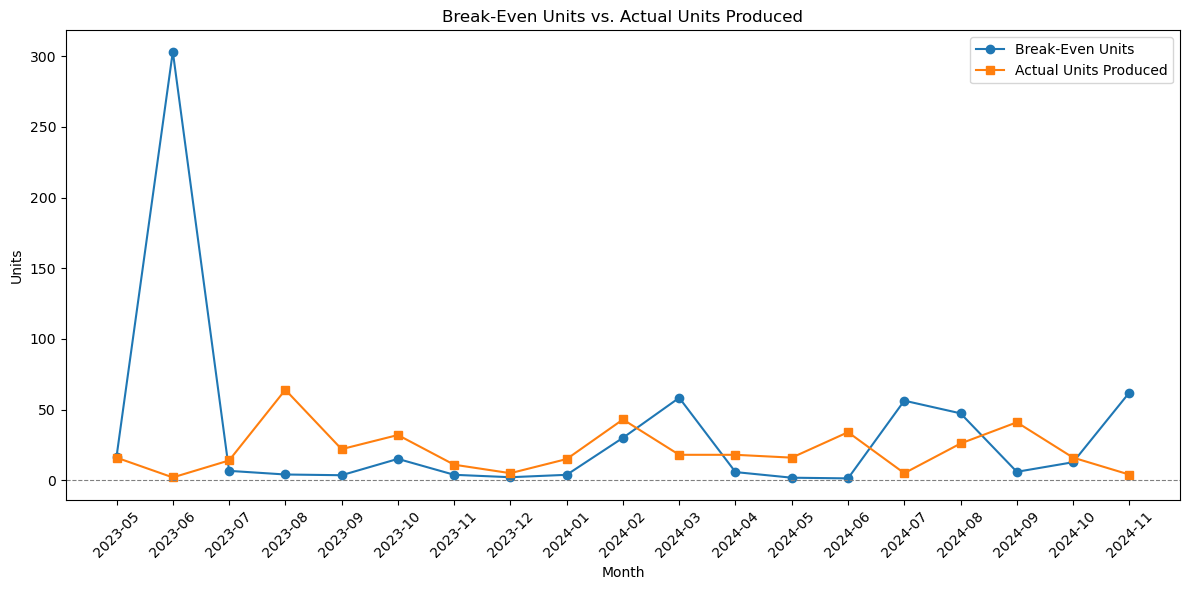

In [78]:
# Plot 1: Break-Even Units vs. Actual Units
plt.figure(figsize=(12, 6))
plt.plot(grouped['Month'], grouped['Break_Even_Units'], label='Break-Even Units', marker='o')
plt.plot(grouped['Month'], grouped['Unit'], label="Actual Units Produced", marker='s')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Units")
plt.title("Break-Even Units vs. Actual Units Produced")
plt.legend()
plt.tight_layout()
plt.show()

- The blue line represents Break-Even Units, and the orange line represents Actual Units Produced.

- The actual units (orange) frequently exceed the break-even units (blue) in several months, suggesting that the company is producing more units than the minimum required to cover its fixed and variable costs.

- There is a sharp spike in Break-Even Units for one month (2023-06), followed by a rapid decrease. This outlier may indicate a one-time surge in required production to cover high costs, which may be due to unusual expenses or mismanagement during that period.

- For most months, Actual Units Produced track closely or exceed Break-Even Units. However, there are occasional months where actual units fall below break-even, suggesting underproduction in those periods.

In [80]:
print(grouped.columns)

Index(['Month', 'Amount', 'Cost', 'Unit', 'Contribution_Margin',
       'Break_Even_Units', 'Average_Revenue_Per_Unit', 'Break-Even Revenue',
       'Year'],
      dtype='object')


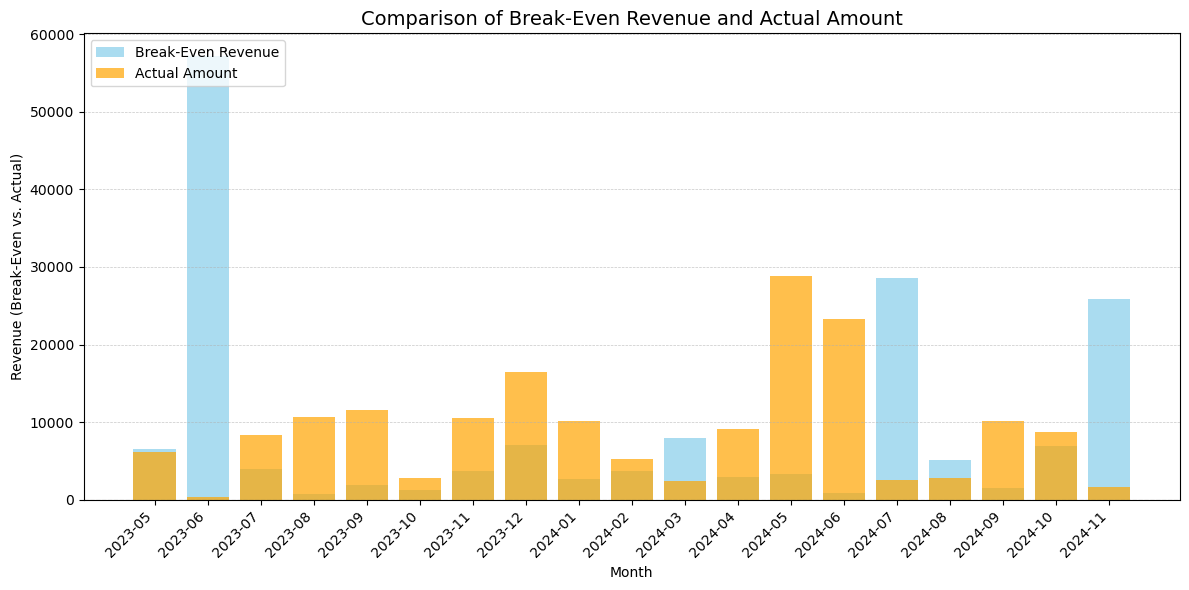

In [81]:
# Plot 2: Break-Even Revenue vs. Actual Amount
plt.figure(figsize=(12, 6))

# Plotting Break-Even Revenue and Actual Amount with distinct colors
plt.bar(grouped["Month"], grouped["Break-Even Revenue"], color='skyblue', label="Break-Even Revenue", alpha=0.7)
plt.bar(grouped["Month"], grouped["Amount"], color='orange', label="Actual Amount", alpha=0.7)

# Adding a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# Improving x-axis and y-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel("Month")
plt.ylabel("Revenue (Break-Even vs. Actual)")

# Enhancing the title
plt.title("Comparison of Break-Even Revenue and Actual Amount", fontsize=14)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Positioning the legend for better visibility
plt.legend(loc='upper left', fontsize=10)

# Adjusting layout for better fit
plt.tight_layout()

# Displaying the plot
plt.show()

The chart compares break-even revenue (blue bars) with actual revenue (yellow bars) across various months, providing insights into significant trends and performance patterns. When combined with the data on the number of units upfitted per month, the analysis offers a clearer understanding of how workload fluctuations impact financial outcomes.

In several months, actual revenue either approaches or exceeds the break-even point, reflecting strong financial performance. For example, August 2023 (52 units) and May 2024 (41 units) demonstrate periods where high workloads corresponded to improved revenue. However, exceptions such as June 2023 (4 units) and July 2024 (5 units) highlight months where break-even revenue spiked dramatically while actual revenue remained low. In June 2023, the workload was notably low, which explains the revenue shortfall. Similarly, July 2024, with only 5 units upfitted, aligns with insufficient job volume contributing to financial underperformance.

Toward the end of 2024, there is a marked improvement in performance. May 2024 (41 units) reflects a period where increased workload translated into higher revenue, showcasing the company's ability to optimize operations during busy months. However, the subsequent drop in activity in June 2024 (1 unit) led to minimal revenue, highlighting the need for better workload forecasting and strategies to mitigate sharp dips in job volume.

Overall, the data underscores a strong correlation between workload and revenue. Periods with low unit counts, such as December 2023 (8 units), June 2024 (1 unit), and November 2024 (4 units), coincide with financial challenges. To ensure consistent revenue generation, the company should address inefficiencies during high-workload months, investigate cost management practices in low-revenue periods, and focus on boosting job intake during quieter months. By aligning workload planning with operational strategies, the company can achieve greater financial stability and performance consistency.

#### Breack Even Analysis Grouping By Month and Type of Unit Upfitted

In [84]:
grouped_data = new_database.groupby(['Month', 'Type']).agg(
    Amount=('Amount', 'sum'),
    Cost=('Cost', 'sum'),
    Unit=('Unit', 'count')
)
grouped_data['Contribution_Margin'] = grouped_data['Amount'] - grouped_data['Cost']

grouped_data

Amount           Cost  Unit  Contribution_Margin
Month   Type                                                                  
2023-05 MSC                 39536.93   28814.150000     5         10722.780000
        Supplementals       59540.94   48287.080019    11         11253.859981
2023-06 Supplementals         755.03     603.305785     2           151.724215
2023-07 MSC                110729.69   63391.130000    11         47338.560000
        Supplementals        6726.27    5633.243070     3          1093.026930
2023-08 MSC                466745.86  172884.900000    30        293860.960000
        Supplementals       81176.63   67259.452391    23         13917.177609
        Ubody              132287.79   78456.400000    11         53831.390000
2023-09 MSC                 50021.19   17288.490000     3         32732.700000
        Supplementals         750.00     627.618017     6           122.381983
        Ubody              202174.72   92721.200000    13        109453.520000
2023-10 Supplementals        4511.88    3631.112337    27           880.767663
        Ubody               83479.94   35662.000000     5         47817.940000
2023-11 MSC                 82196.30   34576.980000     6         47619.320000
        Supplementals        1128.94     933.312621     3           195.627379
        Ubody               32043.08   14264.800000     2         17778.280000
2023-12 MSC                 82321.30   28814.150000     5         53507.150000
2024-01 MSC                132441.13   46102.640000     8         86338.490000
        Supplementals       20137.21   16754.978339     7          3382.231661
2024-02 Supplementals      189322.22  157197.969075    40         32124.250925
        Transit EV          34608.69   33796.470000     3           812.220000
2024-03 MSC                  6423.58    5762.830000     1           660.750000
        Supplementals       37766.59   31330.681465    17          6435.908535
2024-04 MSC                 53828.60   11525.660000     2         42302.940000
        Supplementals       78302.53   65611.312714    14         12691.217286
        Ubody               30945.67   14264.800000     2         16680.870000
2024-05 MSC                162501.38   34576.980000     6        127924.400000
        Supplementals      263783.06  208906.940527     8         54876.119473
        Ubody               35553.58   14264.800000     2         21288.780000
2024-06 Electrical System   37646.97   14749.120000     1         22897.850000
        MSC                754290.22  184410.560000    32        569879.660000
        Supplementals         660.35     574.487792     1            85.862208
2024-07 Supplementals       12696.83   10654.190260     5          2042.639740
2024-08 Supplementals       72465.83   59830.583323    26         12635.246677
2024-09 Supplementals      211412.93  171724.402609    29         39688.527391
        Ubody              203741.84   85588.800000    12        118153.040000
2024-10 MSC Stolen Unit         0.00       0.000000     1             0.000000
        Maverick            30079.72   17851.260000     3         12228.460000
        Supplementals      100271.99   85440.970344    12         14831.019656
2024-11 Supplementals        6658.66    5175.887042     4          1482.772958

In [85]:
# Remove rows where all columns have zero values
grouped_data = grouped_data[~((grouped_data['Amount'] == 0) & 
                              (grouped_data['Cost'] == 0) & 
                              (grouped_data['Unit'] == 0) & 
                              (grouped_data['Contribution_Margin'] == 0))]
grouped_data

Amount           Cost  Unit  Contribution_Margin
Month   Type                                                                  
2023-05 MSC                 39536.93   28814.150000     5         10722.780000
        Supplementals       59540.94   48287.080019    11         11253.859981
2023-06 Supplementals         755.03     603.305785     2           151.724215
2023-07 MSC                110729.69   63391.130000    11         47338.560000
        Supplementals        6726.27    5633.243070     3          1093.026930
2023-08 MSC                466745.86  172884.900000    30        293860.960000
        Supplementals       81176.63   67259.452391    23         13917.177609
        Ubody              132287.79   78456.400000    11         53831.390000
2023-09 MSC                 50021.19   17288.490000     3         32732.700000
        Supplementals         750.00     627.618017     6           122.381983
        Ubody              202174.72   92721.200000    13        109453.520000
2023-10 Supplementals        4511.88    3631.112337    27           880.767663
        Ubody               83479.94   35662.000000     5         47817.940000
2023-11 MSC                 82196.30   34576.980000     6         47619.320000
        Supplementals        1128.94     933.312621     3           195.627379
        Ubody               32043.08   14264.800000     2         17778.280000
2023-12 MSC                 82321.30   28814.150000     5         53507.150000
2024-01 MSC                132441.13   46102.640000     8         86338.490000
        Supplementals       20137.21   16754.978339     7          3382.231661
2024-02 Supplementals      189322.22  157197.969075    40         32124.250925
        Transit EV          34608.69   33796.470000     3           812.220000
2024-03 MSC                  6423.58    5762.830000     1           660.750000
        Supplementals       37766.59   31330.681465    17          6435.908535
2024-04 MSC                 53828.60   11525.660000     2         42302.940000
        Supplementals       78302.53   65611.312714    14         12691.217286
        Ubody               30945.67   14264.800000     2         16680.870000
2024-05 MSC                162501.38   34576.980000     6        127924.400000
        Supplementals      263783.06  208906.940527     8         54876.119473
        Ubody               35553.58   14264.800000     2         21288.780000
2024-06 Electrical System   37646.97   14749.120000     1         22897.850000
        MSC                754290.22  184410.560000    32        569879.660000
        Supplementals         660.35     574.487792     1            85.862208
2024-07 Supplementals       12696.83   10654.190260     5          2042.639740
2024-08 Supplementals       72465.83   59830.583323    26         12635.246677
2024-09 Supplementals      211412.93  171724.402609    29         39688.527391
        Ubody              203741.84   85588.800000    12        118153.040000
2024-10 MSC Stolen Unit         0.00       0.000000     1             0.000000
        Maverick            30079.72   17851.260000     3         12228.460000
        Supplementals      100271.99   85440.970344    12         14831.019656
2024-11 Supplementals        6658.66    5175.887042     4          1482.772958

In [86]:
# Calculate Price per Unit and Variable Cost per Unit
grouped_data['Price_per_Unit'] = grouped_data['Amount'] / grouped_data['Unit']
grouped_data['Variable_Cost_per_Unit'] = grouped_data['Cost'] / grouped_data['Unit']

#Distribute Fixed Costs Across Groups
grouped_data['Proportional_Fixed_Costs'] = (grouped_data['Unit'] / grouped_data.groupby('Month')['Unit'].transform('sum')) * fixed_costs

# Calculate Break-even Units
grouped_data['Break_Even_Units'] = grouped_data['Proportional_Fixed_Costs'] / (grouped_data['Price_per_Unit'] - grouped_data['Variable_Cost_per_Unit'])

# Calculate Break-Even Revenue using Price_Per_Unit
grouped_data['Break-Even Revenue'] = grouped_data['Break_Even_Units'] * grouped_data['Price_per_Unit']

# Display the dataframe with Break-even Units
grouped_data


Amount           Cost  Unit  \
Month   Type                                                
2023-05 MSC                 39536.93   28814.150000     5   
        Supplementals       59540.94   48287.080019    11   
2023-06 Supplementals         755.03     603.305785     2   
2023-07 MSC                110729.69   63391.130000    11   
        Supplementals        6726.27    5633.243070     3   
2023-08 MSC                466745.86  172884.900000    30   
        Supplementals       81176.63   67259.452391    23   
        Ubody              132287.79   78456.400000    11   
2023-09 MSC                 50021.19   17288.490000     3   
        Supplementals         750.00     627.618017     6   
        Ubody              202174.72   92721.200000    13   
2023-10 Supplementals        4511.88    3631.112337    27   
        Ubody               83479.94   35662.000000     5   
2023-11 MSC                 82196.30   34576.980000     6   
        Supplementals        1128.94     933.312621     3   
        Ubody               32043.08   14264.800000     2   
2023-12 MSC                 82321.30   28814.150000     5   
2024-01 MSC                132441.13   46102.640000     8   
        Supplementals       20137.21   16754.978339     7   
2024-02 Supplementals      189322.22  157197.969075    40   
        Transit EV          34608.69   33796.470000     3   
2024-03 MSC                  6423.58    5762.830000     1   
        Supplementals       37766.59   31330.681465    17   
2024-04 MSC                 53828.60   11525.660000     2   
        Supplementals       78302.53   65611.312714    14   
        Ubody               30945.67   14264.800000     2   
2024-05 MSC                162501.38   34576.980000     6   
        Supplementals      263783.06  208906.940527     8   
        Ubody               35553.58   14264.800000     2   
2024-06 Electrical System   37646.97   14749.120000     1   
        MSC                754290.22  184410.560000    32   
        Supplementals         660.35     574.487792     1   
2024-07 Supplementals       12696.83   10654.190260     5   
2024-08 Supplementals       72465.83   59830.583323    26   
2024-09 Supplementals      211412.93  171724.402609    29   
        Ubody              203741.84   85588.800000    12   
2024-10 MSC Stolen Unit         0.00       0.000000     1   
        Maverick            30079.72   17851.260000     3   
        Supplementals      100271.99   85440.970344    12   
2024-11 Supplementals        6658.66    5175.887042     4   

                           Contribution_Margin  Price_per_Unit  \
Month   Type                                                     
2023-05 MSC                       10722.780000     7907.386000   
        Supplementals             11253.859981     5412.812727   
2023-06 Supplementals               151.724215      377.515000   
2023-07 MSC                       47338.560000    10066.335455   
        Supplementals              1093.026930     2242.090000   
2023-08 MSC                      293860.960000    15558.195333   
        Supplementals             13917.177609     3529.418696   
        Ubody                     53831.390000    12026.162727   
2023-09 MSC                       32732.700000    16673.730000   
        Supplementals               122.381983      125.000000   
        Ubody                    109453.520000    15551.901538   
2023-10 Supplementals               880.767663      167.106667   
        Ubody                     47817.940000    16695.988000   
2023-11 MSC                       47619.320000    13699.383333   
        Supplementals               195.627379      376.313333   
        Ubody                     17778.280000    16021.540000   
2023-12 MSC                       53507.150000    16464.260000   
2024-01 MSC                       86338.490000    16555.141250   
        Supplementals              3382.231661     2876.744286   
2024-02 Supplementals             32124.250925     4733.055500   
        Transit

In [87]:
print(grouped_data.dtypes)

Amount                      float64
Cost                        float64
Unit                          int64
Contribution_Margin         float64
Price_per_Unit              float64
Variable_Cost_per_Unit      float64
Proportional_Fixed_Costs    float64
Break_Even_Units            float64
Break-Even Revenue          float64
dtype: object


In [88]:
grouped_data = grouped_data.reset_index()

In [89]:
print(grouped_data.dtypes)

Month                       period[M]
Type                           object
Amount                        float64
Cost                          float64
Unit                            int64
Contribution_Margin           float64
Price_per_Unit                float64
Variable_Cost_per_Unit        float64
Proportional_Fixed_Costs      float64
Break_Even_Units              float64
Break-Even Revenue            float64
dtype: object


In [90]:
# Convert the 'Month' to string for plottinh
grouped_data['Month'] = grouped_data['Month'].astype(str)
grouped_data

,Month,Type,Amount,Cost,Unit,Contribution_Margin,Price_per_Unit,Variable_Cost_per_Unit,Proportional_Fixed_Costs,Break_Even_Units,Break-Even Revenue
0,2023-05,MSC,39536.93,28814.150000,5,10722.780000,7907.386000,5762.830000,7188.056250,3.351769,26503.731009
1,2023-05,Supplementals,59540.94,48287.080019,11,11253.859981,5412.812727,4389.734547,15813.723750,15.457004,83665.869181
2,2023-06,Supplementals,755.03,603.305785,2,151.724215,377.515000,301.652892,23001.780000,303.205127,114464.483626
3,2023-07,MSC,110729.69,63391.130000,11,47338.560000,10066.335455,5762.830000,18072.827143,4.199559,42274.174520
4,2023-07,Supplementals,6726.27,5633.243070,3,1093.026930,2242.090000,1877.747690,4928.952857,13.528357,30331.794050
5,2023-08,MSC,466745.86,172884.900000,30,293860.960000,15558.195333,5762.830000,10782.084375,1.100733,17125.423003
6,2023-08,Supplementals,81176.63,67259.452391,23,13917.177609,3529.418696,2924.324017,8266.264687,13.661110,48215.775416
7,2023-08,Ubody,132287.79,78456.400000,11,53831.390000,12026.162727,7132.400000,3953.430937,0.807851,9715.347154
8,2023-09,MSC,50021.19,17288.490000,3,32732.700000,16673.730000,5762.830000,3136.606364,0.287475,4793.273481
9,2023-09,Supplementals,750.00,627.618017,6,122.381983,125.000000,104.603003,6273.212727,307.555699,38444.462361


**Revenue Trends:**

In 2023, the MSC type generated significantly higher revenues than other types, especially in months like August (466,745.86) and July (110,729.69), suggesting that MSC is a key driver of the business.

Supplementals and Ubody services also show substantial revenues, but they are not as consistently high as MSC, with Supplementals showing strong revenue generation, particularly in June (755.03) and July (6,726.27).

The appearance of new types like Electrical System in 2024, which contributed to a smaller amount of revenue (37,646.97 in June 2024), shows potential diversification.

**Cost Trends:**

The MSC service type has the highest costs, especially noticeable in August 2023 (172,884.90), which is in line with the large amount of revenue generated in that month.

Supplementals tend to have lower costs compared to MSC, but still significant expenses. Ubody services exhibit moderately sized costs, particularly in September (93,721.20) and October (35,662.00).

Electrical System costs are on the lower end (14,749.12) in June 2024, likely due to being a less resource-heavy service.

**Break-Even Analysis:**

The Break-Even_Units metric shows how many units are required to cover all costs. For example, the MSC service in August 2023 required 30 units to break even, while the Supplementals service in the same month only needed 23 units.

There are some months where Break-Even_Units approaches very high values, such as in March 2024 for Supplementals, which had a huge Break-Even_Units requirement of 58,000+ units, likely due to high fixed costs or a low contribution margin.

**Profitability:**

The Contribution Margin is an important indicator of profitability. For instance, in August 2023, MSC had a contribution margin of 107,722.78, which is quite large, indicating strong profitability potential.

In contrast, some months for Supplementals and Ubody show low contribution margins, indicating that those services have tighter margins or higher variable costs.

**Break-Even Revenue:**

The Break-Even Revenue metric shows the revenue needed to break even. For MSC in August 2023, this value is 17,125.42, and Supplementals in June 2024 has a much higher break-even revenue at 120,265.73.

The pattern suggests that MSC is relatively more profitable, with lower break-even revenues than some of the smaller services, like Supplementals, where the break-even revenue is often higher in relation to the amount of revenue generated.

**Seasonality and Fluctuations:**

There is noticeable fluctuation in Amount and Cost from month to month. For example, MSC experiences considerable ups and downs in its revenue, indicating possible seasonal trends or periodic demand surges.

Supplementals show a rise in sales in mid-2023, then fluctuate slightly, with some months like June 2024 seeing a spike in break-even revenue requirements. This suggests that, while it is a smaller service type, there is high sensitivity to fixed and variable costs in certain months.

**New or Specialty Services:**

The Electrical System service in June 2024 and Maverick in October 2024 highlight emerging or niche offerings, with Electrical System showing a very low break-even unit (1), but high Break-Even Revenue relative to the amount of income it generated.

**Recommendations:**

MSC remains the dominant revenue driver and has higher profitability margins. Efforts should be made to maintain and possibly increase its market share while exploring ways to reduce its high costs.

Supplementals and Ubody services need strategies to increase efficiency and reduce the break-even points, especially in months with high proportional fixed costs.

Diversification into niche or emerging services like Electrical System and Maverick could be promising, though their costs and revenues should be carefully monitored to optimize profitability.

Seasonal fluctuations should be accounted for in forecasting and planning, particularly for services with high cost variability or low margin.

### Step 2: Ratio Analysis

Evaluate key profitability metrics:

#### Profit Margin:

$$
\text{Profit Margin} = \frac{\text{Total Amount} - \text{Total Cost}}{\text{Total Amount}} \times 100
$$

This shows how much profit is earned for every dollar of revenue.

#### Cost-to-Revenue Ratio:

$$
\text{Cost-to-Revenue Ratio} = \frac{\text{Total Cost}}{\text{Total Amount}}
$$

This indicates how much of the revenue goes toward covering costs.

#### Break-Even Analysis:

Compare actual revenue and unit production to break-even values:

- **Revenue > Break-Even Revenue**: Profitable
- **Revenue < Break-Even Revenue**: Not profitable

In [93]:
grouped['Profit Margin (%)'] = (grouped['Contribution_Margin'] / grouped['Amount']) * 100
grouped['Cost-to-Revenue'] = grouped['Cost'] / grouped['Amount']

grouped

,Month,Amount,Cost,Unit,Contribution_Margin,Break_Even_Units,Average_Revenue_Per_Unit,Break-Even Revenue,Year,Profit Margin (%),Cost-to-Revenue
0,2023-05,6192.366875,4818.826876,16,1373.539999,16.746349,387.022930,6481.220999,2023,22.181179,0.778188
1,2023-06,377.515000,301.652892,2,75.862108,303.205127,188.757500,57232.241813,2023,20.095124,0.799049
2,2023-07,8389.711429,4930.312362,14,3459.399066,6.649068,599.265102,3984.554477,2023,41.233827,0.587662
3,2023-08,10628.285625,4978.136756,64,5650.148869,4.071004,166.066963,676.059310,2023,53.161432,0.468386
4,2023-09,11497.541364,5028.968546,22,6468.572817,3.555928,522.615517,1858.383213,2023,56.260487,0.437395
5,2023-10,2749.744375,1227.909761,32,1521.834614,15.114507,85.929512,1298.782210,2023,55.344585,0.446554
6,2023-11,10488.029091,4525.008420,11,5963.020671,3.857404,953.457190,3677.869613,2023,56.855493,0.431445
7,2023-12,16464.260000,5762.830000,5,10701.430000,2.149412,3292.852000,7077.694969,2023,64.997941,0.350021
8,2024-01,10171.889333,4190.507889,15,5981.381444,3.845563,678.125956,2607.776178,2024,58.803053,0.411969
9,2024-02,5207.695581,4441.731141,43,765.964440,30.029827,121.109200,3636.888370,2024,14.708318,0.852917


In [94]:
# Create a new column 'Profitability' with "Profitable" or "Not profitable"
grouped['Profitability'] = grouped.apply(
    lambda row: 'Profitable' if row['Amount'] > row['Break-Even Revenue'] else 'Not profitable',
    axis=1
)

grouped

,Month,Amount,Cost,Unit,Contribution_Margin,Break_Even_Units,Average_Revenue_Per_Unit,Break-Even Revenue,Year,Profit Margin (%),Cost-to-Revenue,Profitability
0,2023-05,6192.366875,4818.826876,16,1373.539999,16.746349,387.022930,6481.220999,2023,22.181179,0.778188,Not profitable
1,2023-06,377.515000,301.652892,2,75.862108,303.205127,188.757500,57232.241813,2023,20.095124,0.799049,Not profitable
2,2023-07,8389.711429,4930.312362,14,3459.399066,6.649068,599.265102,3984.554477,2023,41.233827,0.587662,Profitable
3,2023-08,10628.285625,4978.136756,64,5650.148869,4.071004,166.066963,676.059310,2023,53.161432,0.468386,Profitable
4,2023-09,11497.541364,5028.968546,22,6468.572817,3.555928,522.615517,1858.383213,2023,56.260487,0.437395,Profitable
5,2023-10,2749.744375,1227.909761,32,1521.834614,15.114507,85.929512,1298.782210,2023,55.344585,0.446554,Profitable
6,2023-11,10488.029091,4525.008420,11,5963.020671,3.857404,953.457190,3677.869613,2023,56.855493,0.431445,Profitable
7,2023-12,16464.260000,5762.830000,5,10701.430000,2.149412,3292.852000,7077.694969,2023,64.997941,0.350021,Profitable
8,2024-01,10171.889333,4190.507889,15,5981.381444,3.845563,678.125956,2607.776178,2024,58.803053,0.411969,Profitable
9,2024-02,5207.695581,4441.731141,43,765.964440,30.029827,121.109200,3636.888370,2024,14.708318,0.852917,Profitable


In [95]:
grouped['Month'] = pd.to_datetime(grouped['Month'])
grouped.set_index('Month', inplace=True)

# Extract year directly from the 'Month' index (which is already a DatetimeIndex)
grouped['Year'] = grouped.index.year

# Summarize profitability by year
def summarize_profitability(data, year):
    # Filter data for the given year
    year_data = data[data['Year'] == year]
    
    # Count 'Profitable' months
    total_profitable = (year_data['Profitability'] == 'Profitable').sum()
    total_months = len(year_data)
    
    # Determine overall profitability
    return 'Profitable' if total_profitable > total_months / 2 else 'Not Profitable'

# Check profitability for 2023 and 2024
profitability_2023 = summarize_profitability(grouped, 2023)
profitability_2024 = summarize_profitability(grouped, 2024)

print(f"2023 Profitability: {profitability_2023}")
print(f"2024 Profitability: {profitability_2024}")

2023 Profitability: Profitable
2024 Profitability: Profitable


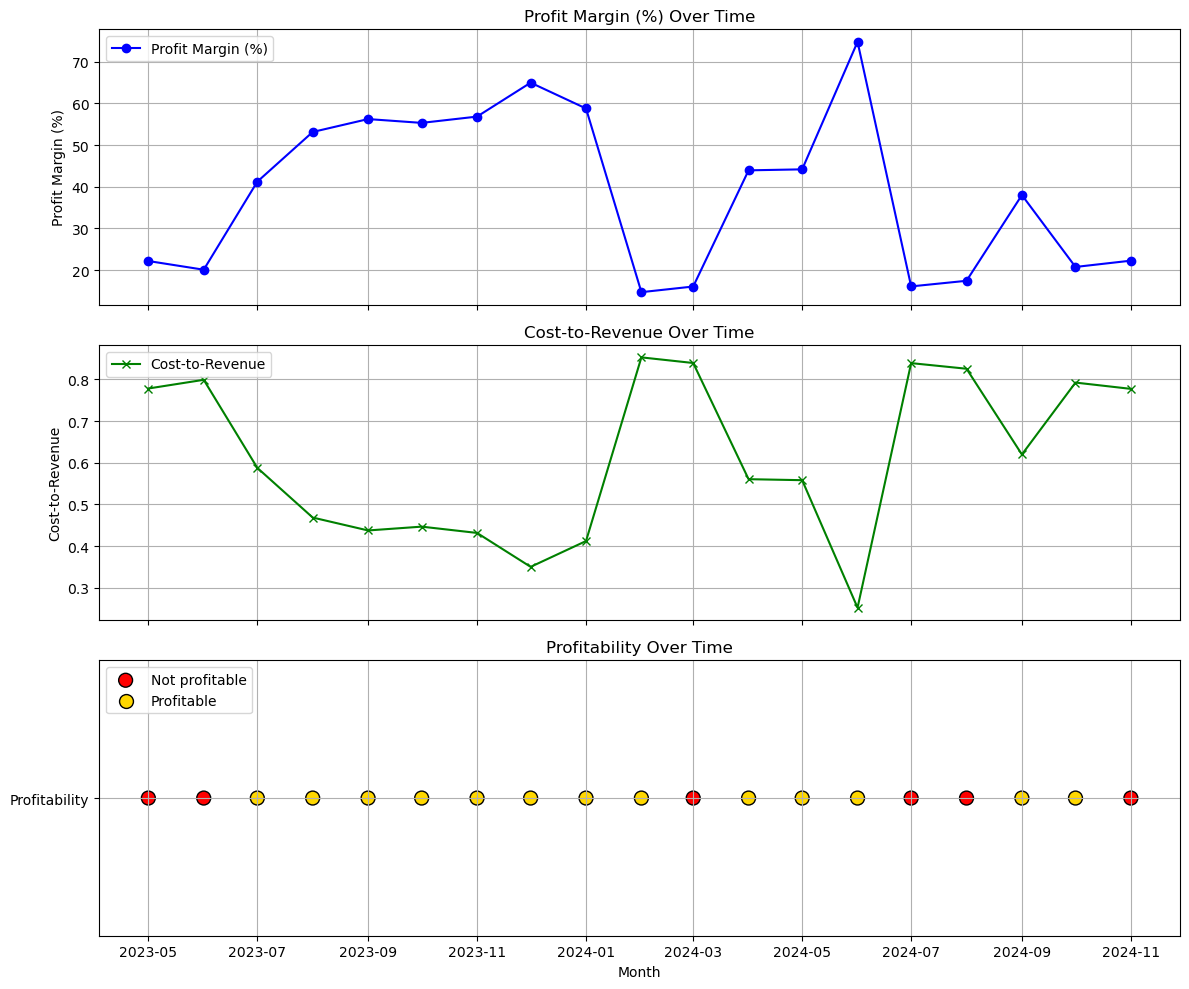

In [96]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot 1: Profit Margin (%)
axes[0].plot(grouped.index, grouped['Profit Margin (%)'], color='blue', marker='o', label='Profit Margin (%)')
axes[0].set_ylabel('Profit Margin (%)')
axes[0].set_title('Profit Margin (%) Over Time')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot 2: Cost-to-Revenue
axes[1].plot(grouped.index, grouped['Cost-to-Revenue'], color='green', marker='x', label='Cost-to-Revenue')
axes[1].set_ylabel('Cost-to-Revenue')
axes[1].set_title('Cost-to-Revenue Over Time')
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Plot 3: Profitability
profit_colors = grouped['Profitability'].map({'Profitable': 'gold', 'Not profitable': 'red'})
axes[2].scatter(grouped.index, [1] * len(grouped), c=profit_colors, s=100, edgecolor='black', label='Not profitable')

# Add custom legends for "Profitable" and "Not profitable"
axes[2].scatter([], [], c='gold', s=100, edgecolor='black', label='Profitable')

axes[2].set_yticks([1])
axes[2].set_yticklabels(['Profitability'])
axes[2].set_ylabel('')
axes[2].set_title('Profitability Over Time')
axes[2].legend(loc='upper left')
axes[2].grid(True)


# Add a shared x-axis label
plt.xlabel('Month')

# Adjust layout
plt.tight_layout()
plt.show()

**Profit Margin (%) Over Time**

There is a significant upward trend in profit margin during certain months, followed by noticeable drops.
Peak profit margins are observed sporadically, suggesting strong performance in those months but with inconsistent sustainability.
Variations could indicate fluctuating demand, seasonality, or operational inefficiencies. Specifically, the observed pattern might be linked to lower demand for upfitting units typically seen at the end and beginning of the year, when businesses may delay or reduce investments in fleet upgrades due to budget constraints or seasonal slowdowns.

**Cost-to-Revenue Over Time**

A lower cost-to-revenue ratio generally corresponds to higher profit margins, as a smaller portion of revenue is consumed by costs. This is visible in periods where the cost-to-revenue ratio drops, aligning with peaks in profit margin.
Conversely, when the cost-to-revenue ratio increases, it typically results in lower profit margins due to higher costs relative to revenue.

**Profitability Over Time**

A clear division is visible between months classified as profitable (yellow markers) and not profitable (red markers).
Profitability appears mostly stable, with some months showing recurring losses.
Overall, we can see from the year probability results shown before that both years, 2023 and 2024 are profitable.

**Conclusion**

The cost-to-revenue ratio is a leading indicator of profitability, with its fluctuations closely mirroring the trends in the profit margin. Sustained low cost-to-revenue ratios reflect efficient operations and lead to higher profit margins, while spikes in the ratio often signal inefficiencies or reduced revenue, directly impacting profitability.

One key factor contributing to these drops in profit margin and profitability could be the company's reliance on a single client. With only one client (Amerit), Apt Fitting faces the risk of a low workload during periods of reduced demand or project gaps. Expanding the client base would help stabilize workload and revenue streams, reducing the impact of seasonal demand fluctuations and underutilization of resources. Diversifying the client portfolio would also spread risk and create more consistent opportunities for growth, potentially smoothing out these dips in performance over time.


## Machine Learning

I will use Machine Learning (ML) to predict outcomes based on the existing data and estimate what the company needs to do when expanding to a new client.

To the purpose of this study I will use a potential client for Apt Fitting, which would be Enterprise with recon units, a recon unit  services that Apt Fitting offers is paint, body work, mechanical, aftermarket, and customized repair solutions. With Enterprise, the specific recon services will be:

- DE ID
- Painting of the wheels
- Painting of the gate and platform
- Painting of the steps
- Detail

The data to have in mind is:

- Units per month: 12 - 15 (or an average of 13.5)
  
- Amount per unit: $1,300
  
- Cost per unit: $124.41

### Data Preparation

In [100]:
# Add Enterprise prediction data (example prediction for the next 12 months)
Enterprise = pd.DataFrame({
    'Month': pd.date_range(start='2024-12', periods=12, freq='M'),
    'Amount': [1300] * 12,
    'Cost': [124.41] * 12,
    'Unit': [12, 13, 14, 15, 12, 13, 14, 15, 13, 14, 12, 15],  #Units per month
    'Fixed_costs': [28500] * 12, # Adjusted for new warehouse cost, Utilities rase.
    'Employee_count': [5] * 12  # Current team size
})

Enterprise

,Month,Amount,Cost,Unit,Fixed_costs,Employee_count
0,2024-12-31,1300,124.41,12,28500,5
1,2025-01-31,1300,124.41,13,28500,5
2,2025-02-28,1300,124.41,14,28500,5
3,2025-03-31,1300,124.41,15,28500,5
4,2025-04-30,1300,124.41,12,28500,5
5,2025-05-31,1300,124.41,13,28500,5
6,2025-06-30,1300,124.41,14,28500,5
7,2025-07-31,1300,124.41,15,28500,5
8,2025-08-31,1300,124.41,13,28500,5
9,2025-09-30,1300,124.41,14,28500,5


In [101]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2023-05-01 to 2024-11-01
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Amount                    19 non-null     float64
 1   Cost                      19 non-null     float64
 2   Unit                      19 non-null     int64  
 3   Contribution_Margin       19 non-null     float64
 4   Break_Even_Units          19 non-null     float64
 5   Average_Revenue_Per_Unit  19 non-null     float64
 6   Break-Even Revenue        19 non-null     float64
 7   Year                      19 non-null     int32  
 8   Profit Margin (%)         19 non-null     float64
 9   Cost-to-Revenue           19 non-null     float64
 10  Profitability             19 non-null     object 
dtypes: float64(8), int32(1), int64(1), object(1)
memory usage: 1.7+ KB


In [102]:
# Ensure the 'Month' column is in datetime format if it is the index
grouped.index = pd.to_datetime(grouped.index)

# Adjust the 'Month' column to be the last day of the month
grouped.index = grouped.index + pd.offsets.MonthEnd(0)

# Reset the index to make 'Month' a column
grouped = grouped.reset_index() 

# Select only the relevant columns ('Amount', 'Cost', 'Unit')
Amerit = grouped[['Month', 'Amount', 'Cost', 'Unit']]

# Divide the 'Amount' by 'Unit' to get the Average Amount per unit
Amerit['Amount'] = Amerit['Amount'] / Amerit['Unit']

# Divide the 'Cost' by 'Unit' to get the Average Cost per unit
Amerit['Cost'] = Amerit['Cost'] / Amerit['Unit']

# Add the 'Fixed_costs' column and  to the Amerit DataFrame with the fixed value
employee_count = 5  # Current team size

Amerit['Employee_count'] = employee_count  

# Display the first few rows of the new dataset to verify
Amerit

/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/3230651444.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit['Amount'] = Amerit['Amount'] / Amerit['Unit']
/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/3230651444.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit['Cost'] = Amerit['Cost'] / Amerit['Unit']
/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/3230651444.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Month,Amount,Cost,Unit,Employee_count
0,2023-05-31,387.022930,301.176680,16,5
1,2023-06-30,188.757500,150.826446,2,5
2,2023-07-31,599.265102,352.165169,14,5
3,2023-08-31,166.066963,77.783387,64,5
4,2023-09-30,522.615517,228.589479,22,5
5,2023-10-31,85.929512,38.372180,32,5
6,2023-11-30,953.457190,411.364402,11,5
7,2023-12-31,3292.852000,1152.566000,5,5
8,2024-01-31,678.125956,279.367193,15,5
9,2024-02-29,121.109200,103.296073,43,5


In [103]:
#Add predicted next 12 months based on data from Amerit generated in related past months.


# Ensure 'Month' column is in datetime format
Amerit['Month'] = pd.to_datetime(Amerit['Month'])

# Define the new months we want to add (from 2024-12-31 to 2025-11-30)
new_months = pd.date_range(start='2024-11-30', end='2025-11-30', freq='MS') + pd.DateOffset(day=31)  # Adjust to last day of the month

# List to store the new rows
new_rows = []

# Loop through each of the new months
for new_month in new_months:
    # Get the corresponding previous year month from Amerit (e.g., 2023-12 for 2024-12)
    prev_year_month = new_month - pd.DateOffset(years=1)
    
    # Find the data for the same month from the previous year by comparing year and month
    matching_row = Amerit[Amerit['Month'].dt.year == prev_year_month.year]
    matching_row = matching_row[matching_row['Month'].dt.month == prev_year_month.month]
    
    # If a matching row is found, append it to the new_rows list with the updated month
    if not matching_row.empty:
        new_row = matching_row.copy()
        new_row['Month'] = new_month  # Update the Month to the new month
        new_rows.append(new_row)

# If any rows were added, concatenate them
if new_rows:
    new_amerit_data = pd.concat(new_rows, ignore_index=True)
    # Combine the original Amerit Data with the new rows
    combined_amerit_data = pd.concat([Amerit, new_amerit_data], ignore_index=True)
else:
    combined_amerit_data = Amerit

# Display the combined DataFrame with the added rows
combined_amerit_data

/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/1515643614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amerit['Month'] = pd.to_datetime(Amerit['Month'])
/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/1515643614.py:8: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  new_months = pd.date_range(start='2024-11-30', end='2025-11-30', freq='MS') + pd.DateOffset(day=31)  # Adjust to last day of the month


,Month,Amount,Cost,Unit,Employee_count
0,2023-05-31,387.022930,301.176680,16,5
1,2023-06-30,188.757500,150.826446,2,5
2,2023-07-31,599.265102,352.165169,14,5
3,2023-08-31,166.066963,77.783387,64,5
4,2023-09-30,522.615517,228.589479,22,5
5,2023-10-31,85.929512,38.372180,32,5
6,2023-11-30,953.457190,411.364402,11,5
7,2023-12-31,3292.852000,1152.566000,5,5
8,2024-01-31,678.125956,279.367193,15,5
9,2024-02-29,121.109200,103.296073,43,5


In [104]:
#Merge Data

#  Ensure 'Month' columns in both datasets are in datetime format
combined_amerit_data['Month'] = pd.to_datetime(combined_amerit_data['Month'])
Enterprise['Month'] = pd.to_datetime(Enterprise['Month'])

# Merge Amerit and Enterprise data on 'Month', with how='left' to keep all Amerit rows
combined = pd.merge(combined_amerit_data, Enterprise, on='Month', how='left', suffixes=('_Amerit', '_Enterprise'))

# For rows where both Amerit and Enterprise data exist, sum the 'Amount' and 'Cost' values
combined['Amount'] = combined['Amount_Amerit'] + combined['Amount_Enterprise'].fillna(0)
combined['Cost'] = combined['Cost_Amerit'] + combined['Cost_Enterprise'].fillna(0)
combined['Unit'] = combined['Unit_Amerit'] + combined['Unit_Enterprise'].fillna(0)

# If there are no matching rows for Enterprise, keep the Amerit data
# Add Employee_count as a constant value (since it doesn't change across the merged dataset)
combined['Employee_count'] = 5  

# Add the 'Fixed_costs' column based on the month range - the new rent would be apply for next year
# Assuming that the company will move after starting with the new client.
combined['Fixed_costs'] = combined['Month'].apply(
    lambda x: 18535 if pd.Timestamp('2023-05-31') <= x <= pd.Timestamp('2025-01-31') 
              else 20548  if pd.Timestamp('2025-02-28') <= x <= pd.Timestamp('2025-11-30') 
              else None
)

# Select the relevant columns for the final dataset
combined = combined[['Month', 'Amount', 'Cost', 'Unit', 'Employee_count', 'Fixed_costs']]  # Include 'Fixed_costs'


# Display the first few rows of the new dataset to verify
combined

,Month,Amount,Cost,Unit,Employee_count,Fixed_costs
0,2023-05-31,387.022930,301.176680,16.0,5,18535
1,2023-06-30,188.757500,150.826446,2.0,5,18535
2,2023-07-31,599.265102,352.165169,14.0,5,18535
3,2023-08-31,166.066963,77.783387,64.0,5,18535
4,2023-09-30,522.615517,228.589479,22.0,5,18535
5,2023-10-31,85.929512,38.372180,32.0,5,18535
6,2023-11-30,953.457190,411.364402,11.0,5,18535
7,2023-12-31,3292.852000,1152.566000,5.0,5,18535
8,2024-01-31,678.125956,279.367193,15.0,5,18535
9,2024-02-29,121.109200,103.296073,43.0,5,18535


In [105]:
# Calculate additional fields (Total Revenue, Total Cost, Profit Margin)
combined['Total_Revenue'] = combined['Unit'] * combined['Amount']
combined['Total_Cost'] = (combined['Unit'] * combined['Cost']) + combined['Fixed_costs']
combined['Profit_Margin'] = (combined['Total_Revenue'] - combined['Total_Cost']) / combined['Total_Revenue'] * 100

combined

,Month,Amount,Cost,Unit,Employee_count,Fixed_costs,Total_Revenue,Total_Cost,Profit_Margin
0,2023-05-31,387.022930,301.176680,16.0,5,18535,6192.366875,23353.826876,-277.138941
1,2023-06-30,188.757500,150.826446,2.0,5,18535,377.515000,18836.652892,-4889.643562
2,2023-07-31,599.265102,352.165169,14.0,5,18535,8389.711429,23465.312362,-179.691531
3,2023-08-31,166.066963,77.783387,64.0,5,18535,10628.285625,23513.136756,-121.231698
4,2023-09-30,522.615517,228.589479,22.0,5,18535,11497.541364,23563.968546,-104.947891
5,2023-10-31,85.929512,38.372180,32.0,5,18535,2749.744375,19762.909761,-618.718072
6,2023-11-30,953.457190,411.364402,11.0,5,18535,10488.029091,23060.008420,-119.869798
7,2023-12-31,3292.852000,1152.566000,5.0,5,18535,16464.260000,24297.830000,-47.579241
8,2024-01-31,678.125956,279.367193,15.0,5,18535,10171.889333,22725.507889,-123.414817
9,2024-02-29,121.109200,103.296073,43.0,5,18535,5207.695581,22976.731141,-341.207263


### 2. Predict Profitability
Using a Random Forest Regressor, we predict the profitability for the combined workload.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Features to use for training
X = combined[['Unit', 'Amount', 'Cost', 'Employee_count', 'Fixed_costs']]  # Independent variables

# Target variable (Profit Margin)
y = combined['Profit_Margin']  # Target: Profitability (Profit Margin)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 42.71628552662439
R² Score: 0.9294175518718305


Mean Absolute Error (MAE): 43.67
This means that, on average, the model's predictions are off by about 43.67 units in terms of the profitability target.

R² Score: 0.93
This indicates that about 93% of the variability in the target variable (profitability) is explained by the model. A score close to 1 suggests that the model fits the data well.

These results suggest that the model has strong predictive power and can be reliable for forecasting profitability, especially when combining both Amerit and Enterprise data. You can now use these insights to evaluate how well the model performs and to inform any adjustments to the business strategy or forecasts based on the predicted profitability.

In [109]:
# Predict Future Profitability

# Predict profitability for future months (using the combined data structure)
future_data = combined[['Unit', 'Amount', 'Cost', 'Employee_count', 'Fixed_costs']]
predicted_profit_margin = model.predict(future_data)

# Add the predicted profit margin to the combined data
combined['Predicted_Profit_Margin'] = predicted_profit_margin
combined

,Month,Amount,Cost,Unit,Employee_count,Fixed_costs,Total_Revenue,Total_Cost,Profit_Margin,Predicted_Profit_Margin
0,2023-05-31,387.022930,301.176680,16.0,5,18535,6192.366875,23353.826876,-277.138941,-312.493327
1,2023-06-30,188.757500,150.826446,2.0,5,18535,377.515000,18836.652892,-4889.643562,-3452.712645
2,2023-07-31,599.265102,352.165169,14.0,5,18535,8389.711429,23465.312362,-179.691531,-163.440143
3,2023-08-31,166.066963,77.783387,64.0,5,18535,10628.285625,23513.136756,-121.231698,-257.837717
4,2023-09-30,522.615517,228.589479,22.0,5,18535,11497.541364,23563.968546,-104.947891,-169.703352
5,2023-10-31,85.929512,38.372180,32.0,5,18535,2749.744375,19762.909761,-618.718072,-571.246511
6,2023-11-30,953.457190,411.364402,11.0,5,18535,10488.029091,23060.008420,-119.869798,-96.257944
7,2023-12-31,3292.852000,1152.566000,5.0,5,18535,16464.260000,24297.830000,-47.579241,-418.314272
8,2024-01-31,678.125956,279.367193,15.0,5,18535,10171.889333,22725.507889,-123.414817,-101.357771
9,2024-02-29,121.109200,103.296073,43.0,5,18535,5207.695581,22976.731141,-341.207263,-481.246502


### Time Series Forecasting
Using Prophet (a library for time series forecasting), predict future revenues and costs.


00:42:19 - cmdstanpy - INFO - Chain [1] start processing
00:42:19 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
31 2025-12-31  100787.293572   85252.394931  116417.301728
32 2026-01-31   82320.405728   66127.032040   98800.954422
33 2026-02-28  122310.178608  106332.199479  137831.697345
34 2026-03-31   67967.874188   51938.109211   83159.960209
35 2026-04-30   68139.238579   52126.375770   84467.761764
36 2026-05-31  100605.284455   85258.288607  116309.515901
37 2026-06-30   96711.596360   80480.418692  113229.544270
38 2026-07-31   80435.979201   63840.776831   95422.916572
39 2026-08-31   86357.443588   69694.086205  102830.409789
40 2026-09-30   96172.095409   81451.837033  112349.488898
41 2026-10-31   81607.630931   65134.128277   98222.079139
42 2026-11-30   80596.932615   64050.683346   95445.430726


/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_55668/2022879624.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model.plot(forecast).show()


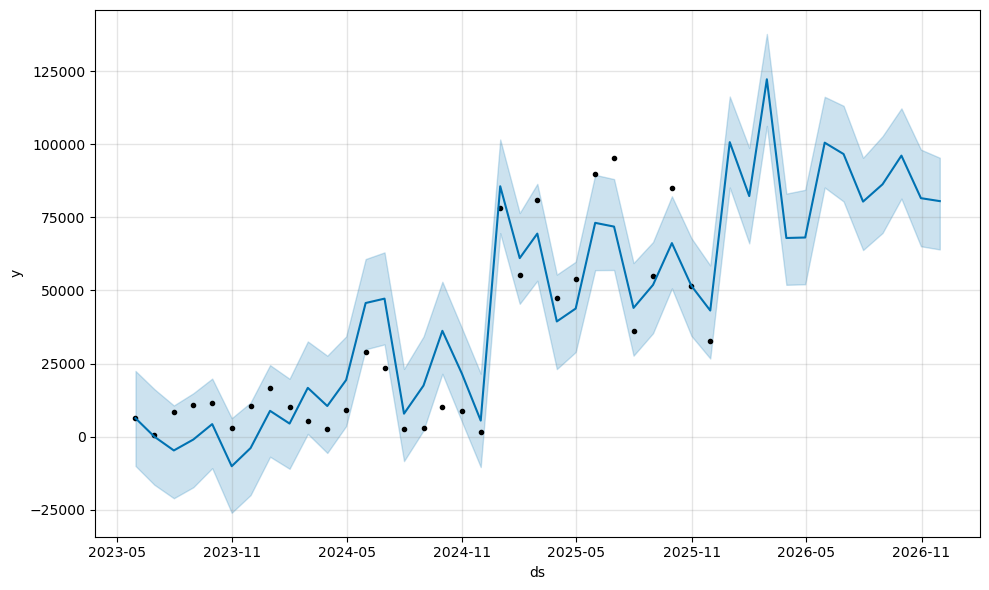

In [111]:
from prophet import Prophet

# Prepare data for Prophet
time_series_data = combined[['Month', 'Total_Revenue']]
time_series_data = time_series_data.rename(columns={'Month': 'ds', 'Total_Revenue': 'y'})

# Initialize and train the model
model = Prophet()
model.fit(time_series_data)

# Make future predictions (e.g., 12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast).show()

# Predicted revenue
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


This plot depicts a time series forecast with confidence intervals, showing observed values (black dots), forecasted trends (blue line), and the associated uncertainty (shaded areas). The analysis of the graph reveals several critical insights.

The time series analysis, supported by the Prophet forecasting model, highlights important trends in the company’s revenue over time. Historical data up to November 2024 reflects operations with a single client, showing an upward trend but with noticeable fluctuations, indicating seasonal or cyclical demand patterns. From December 2024 onward, predictions account for the addition of a second client, which appears to significantly increase overall revenue. The forecast reveals a clear growth trajectory, suggesting potential profitability for expansion, although seasonal dips and peaks persist. Confidence intervals widen as the forecast extends into the future, emphasizing the uncertainty of long-term predictions and the need for adaptive strategies. The addition of a second client reduces the company’s dependency on a single revenue source, stabilizing income and enhancing scalability. However, careful planning is required to manage operational capacity during high-demand periods and to address variability during downturns.

In [116]:
# Estimate the number of additional administrative workers and technicians needed based on forecasted workload and current productivity:

# Current resource capacities
current_technicians = 3
technician_capacity = 64 / current_technicians  # Workload capacity per technician per month

current_administrators = 1
administrator_capacity = 100  # Assumed maximum tasks per administrator per month


# Calculate additional technicians required
combined["Additional_Techs_Required"] = (combined["Unit"] - (current_technicians * technician_capacity)).apply(
    lambda x: max(0, (x // technician_capacity) + 1)
)

# Calculate administrative workload trend
# Assuming administrative tasks grow at 10% of total units
combined["Admin_Workload"] = combined["Unit"] * 0.1

# Calculate additional administrators required
combined["Additional_Admins_Required"] = (combined["Admin_Workload"] - (current_administrators * administrator_capacity)).apply(
    lambda x: max(0, (x // administrator_capacity) + 1)
)

# Results
combined[["Month", "Unit", "Admin_Workload", "Additional_Techs_Required", "Additional_Admins_Required"]]

,Month,Unit,Admin_Workload,Additional_Techs_Required,Additional_Admins_Required
0,2023-05-31,16.0,1.6,0.0,0
1,2023-06-30,2.0,0.2,0.0,0
2,2023-07-31,14.0,1.4,0.0,0
3,2023-08-31,64.0,6.4,1.0,0
4,2023-09-30,22.0,2.2,0.0,0
5,2023-10-31,32.0,3.2,0.0,0
6,2023-11-30,11.0,1.1,0.0,0
7,2023-12-31,5.0,0.5,0.0,0
8,2024-01-31,15.0,1.5,0.0,0
9,2024-02-29,43.0,4.3,0.0,0


**Administrative Staff:**

The calculated administrative workload (10% of total units) is well within the capacity of the current single administrator (50 units/month), so no additional administrators are required for any month.

Even in peak months, such as February 2025 (5.7 units), the workload remains manageable with the current capacity.

**Technician Requirements:**

For most months, the workload remains within the maximum capacity of 64 units/month handled by the current 3 technicians.

## SUMMARY

**Profitability Analysis:**
Profit margins show variability, with some months demonstrating high profits while others experience recurring losses. This suggests that seasonal trends and operational inefficiencies may be influencing profitability. Overall, profitability remains stable, but inconsistencies indicate areas for improvement.

Revenue trends exhibit a broad range of performance, largely driven by the type of service and seasonal demand. MSC services are the primary revenue driver, while Supplementals and Ubody services offer moderate profitability. Break-even analysis reveals MSC as the most efficient service, with lower revenue and unit thresholds compared to services like Supplementals, which require higher fixed costs.

**Operational Trends:**
Monthly revenue, costs, and contribution margins show significant variability, largely attributed to seasonal demand fluctuations and the service mix. High-revenue months significantly outperform lower-revenue periods, contributing to the overall financial inconsistency. Additionally, resource utilization is inconsistent, with high costs in certain months reducing overall profitability.

**Growth Potential:**
Emerging services, such as Electrical Systems, demonstrate potential for diversification but come with challenges, including the need for careful cost management. The company's dependence on a single client (Amerit) limits scalability, exposing it to risks from demand fluctuations. Expanding the client base could help stabilize revenue streams and improve capacity utilization.


#### Research Questions Answered:

**Main Research Question:**

Apt Fitting shows profitability potential, particularly through its MSC services. However, to justify expansion, the company must address the variability in revenue and operational inefficiencies. Expanding the client portfolio and improving resource allocation are crucial for supporting long-term growth.

**Supporting Sub-Questions:**

**Trends in Revenue and Costs:** MSC services generate the highest revenue and incur significant costs, while variability in Supplementals signals operational inefficiencies that need to be addressed.

**Performance Indicators:** High contribution margins and stable profit margins in certain months indicate growth potential. MSC services are identified as scalable, but Supplementals need efficiency improvements.

**Resource Capacity:** The current reliance on Amerit poses a bottleneck. Expanding to other clients could mitigate risks and enhance demand. Operational improvements are necessary to ensure scalability during low-performing months.


#### Recommendations:

- Focus on stabilizing revenue and managing operational costs to reduce variability.
- Leverage profitable services like MSC while improving the efficiency of less profitable services like Supplementals.
- Expand the client base to diversify income and reduce dependency on Amerit.
- Enhance workload planning and introduce tracking measures (e.g., Work Start and End Dates) to improve efficiency and demonstrate competitive advantages.